# 패키지 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic') #plt를 통해 글꼴 설정
plt.rc('axes',unicode_minus=False)

In [3]:
from IPython.display import set_matplotlib_formats
#폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_25500/169946400.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [4]:
df=pd.read_csv('소상공인시장진흥공단_상가업소정보_의료기관_201909.csv',low_memory=False)
df.shape

(91335, 39)

In [5]:
df.head(1)

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873  하나산부인과  NaN         S       의료       S01       병원    S01B10   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
0     산부인과   Q86201  ...  4127310900110810000010857  산호한양아파트   

                도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도         위도  
0  경기도 안산시 단원구 달미로 10  425764.0  15236.0  NaN  NaN  NaN  126.814295  37.336344  

[1 rows x 39 columns]

# 데이터 검토 및 결측치 제거

In [6]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

In [8]:
null_count=df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<Axes: >

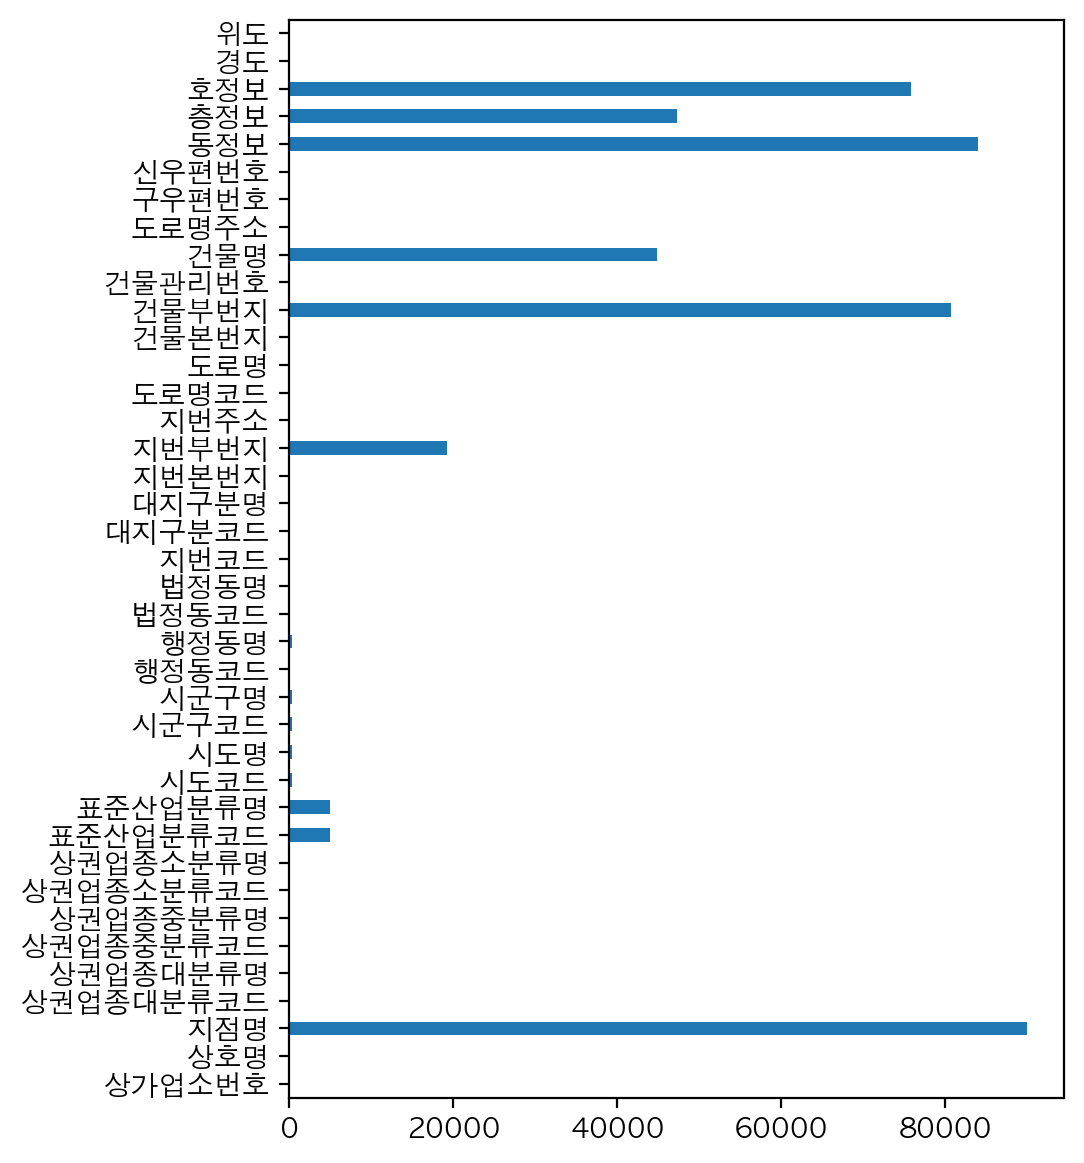

In [9]:
null_count.plot.barh(figsize=(5,7)) #글자 돌리기

In [10]:
df_null_count=null_count.reset_index()
df_null_count.head()

index      0
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

In [11]:
#칼럼명 변경하기
df_null_count.columns=['컬럼명','결측치수'] 
df_null_count.head()

컬럼명   결측치수
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

In [12]:
df_null_count_top=df_null_count.sort_values(by='결측치수',ascending=False).head(10) #결측치수 정렬하기

In [13]:
df['지점명'] #nan 은 not a number 의 약자로 결측치를 이야기함.

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [14]:
df_null_count['컬럼명'].head()

0       상가업소번호
1          상호명
2          지점명
3    상권업종대분류코드
4     상권업종대분류명
Name: 컬럼명, dtype: object

In [15]:
drop_columns=df_null_count_top['컬럼명'].tolist() 
df[drop_columns].head()

지점명  동정보  건물부번지  호정보  층정보      건물명  지번부번지 표준산업분류코드         표준산업분류명  시도코드
0  NaN  NaN    NaN  NaN  NaN  산호한양아파트    NaN   Q86201           일반 의원  41.0
1  NaN  NaN    NaN  NaN    4      NaN   14.0   Q86201           일반 의원  11.0
2  NaN  NaN    NaN  NaN  NaN    한라프라자    1.0   Q86201           일반 의원  41.0
3  NaN  NaN    NaN  NaN    5      NaN    1.0      NaN             NaN  26.0
4  수지점  NaN    NaN  NaN    1      NaN    2.0   G47811  의약품 및 의료용품 소매업  41.0

In [16]:
print(df.shape)
df=df.drop(drop_columns,axis=1) #0이면 행을 기준으로 드랍을 하는 것 / 1은 랭을 기준으로 드랍
print(df.shape)

#inplace는 개발자 사이에서도 논란이 많기 때문에 df변수에다가 값을 넣기

(91335, 39)
(91335, 29)


In [17]:
df.info() #컬럼의 수가 39에서 29개로 줄어듬 /  27메가에서 20메가로 메모리 용량이 줄어든 것을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

In [18]:
df['위도'].mean()

36.62471119236685

In [19]:
df['위도'].median()

37.2346523177033

In [20]:
df['위도'].max()

38.4996585705598

In [21]:
df['위도'].min()

33.2192896688307

In [22]:
df['위도'].count() #결측치를 제외한 값

91335

In [23]:
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [24]:
df[['위도','경도']].describe() #2개 이상의 데이터를 가져올 때는 대괄호를 2개 사용하기

위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084550
75%       37.507463    128.108919
max       38.499659    130.909912

In [25]:
df.describe(include='number') # 수치형 데이터를 가져옴

상가업소번호         시군구코드         행정동코드         법정동코드          지번코드  \
count  9.133500e+04  90956.000000  9.133500e+04  9.128000e+04  9.133500e+04   
mean   2.121818e+07  32898.381877  3.293232e+09  3.293385e+09  3.293191e+18   
std    5.042828e+06  12985.393171  1.297387e+09  1.297706e+09  1.297393e+18   
min    2.901108e+06  11110.000000  1.111052e+09  1.111010e+09  1.111010e+18   
25%    2.001931e+07  26350.000000  2.635065e+09  2.635011e+09  2.635011e+18   
50%    2.211900e+07  41117.000000  4.111758e+09  4.111710e+09  4.111711e+18   
75%    2.480984e+07  43113.000000  4.311370e+09  4.311311e+09  4.311311e+18   
max    2.852470e+07  50130.000000  5.013061e+09  5.013032e+09  5.013061e+18   

             대지구분코드         지번본번지         도로명코드         건물본번지          구우편번호  \
count  91335.000000  91335.000000  9.133500e+04  91335.000000   91323.000000   
mean       1.001336    587.534549  3.293207e+11    251.200482  428432.911085   
std        0.036524    582.519364  1.297391e+11    477.456487  193292.339066   
min        1.000000      1.000000  1.111020e+11      0.000000  100011.000000   
25%        1.000000    162.000000  2.635042e+11     29.000000  302120.000000   
50%        1.000000    462.000000  4.111743e+11     92.000000  440300.000000   
75%        1.000000    858.000000  4.311332e+11    257.000000  602811.000000   
max        2.000000   7338.000000  5.013049e+11   8795.000000  799801.000000   

             신우편번호            경도            위도  
count  91333.00000  91335.000000  91335.000000  
mean   28085.47698    127.487524     36.624711  
std    18909.01455      0.842877      1.041361  
min     1000.00000    124.717632     33.219290  
25%    11681.00000    126.914297     35.811830  
50%    24353.00000    127.084550     37.234652  
75%    46044.00000    128.108919     37.507463  
max    63643.00000    130.909912     38.499659

In [26]:
 df.describe(include='object') # 문자형으로 데이터를 가져옴

상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명    시도명  \
count   91335     91335    91335     91335    91335     91335    91335  90956   
unique  56910         1        1         5        5        34       34     17   
top        리원         S       의료       S01       병원    S02A01       약국    경기도   
freq      152     91335    91335     60774    60774     18964    18964  21374   

         시군구명   행정동명   법정동명  대지구분명                  지번주소             도로명  \
count   90956  90956  91280  91335                 91335           91335   
unique    228   2791   2822      2                 53118           16610   
top        서구    중앙동     중동     대지  서울특별시 동대문구 제기동 965-1  서울특별시 강남구 강남대로   
freq     3165   1856    874  91213                   198             326   

                           건물관리번호                  도로명주소  
count                       91335                  91335  
unique                      54142                  54031  
top     1123010300109650001031604  서울특별시 동대문구 약령중앙로8길 10  
freq                          198                    198

In [27]:
df.describe(include='all')

상가업소번호    상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
count   9.133500e+04  91335     91335    91335     91335    91335     91335   
unique           NaN  56910         1        1         5        5        34   
top              NaN     리원         S       의료       S01       병원    S02A01   
freq             NaN    152     91335    91335     60774    60774     18964   
mean    2.121818e+07    NaN       NaN      NaN       NaN      NaN       NaN   
std     5.042828e+06    NaN       NaN      NaN       NaN      NaN       NaN   
min     2.901108e+06    NaN       NaN      NaN       NaN      NaN       NaN   
25%     2.001931e+07    NaN       NaN      NaN       NaN      NaN       NaN   
50%     2.211900e+07    NaN       NaN      NaN       NaN      NaN       NaN   
75%     2.480984e+07    NaN       NaN      NaN       NaN      NaN       NaN   
max     2.852470e+07    NaN       NaN      NaN       NaN      NaN       NaN   

       상권업종소분류명    시도명         시군구코드  ...                  지번주소         도로명코드  \
count     91335  90956  90956.000000  ...                 91335  9.133500e+04   
unique       34     17           NaN  ...                 53118           NaN   
top          약국    경기도           NaN  ...  서울특별시 동대문구 제기동 965-1           NaN   
freq      18964  21374           NaN  ...                   198           NaN   
mean        NaN    NaN  32898.381877  ...                   NaN  3.293207e+11   
std         NaN    NaN  12985.393171  ...                   NaN  1.297391e+11   
min         NaN    NaN  11110.000000  ...                   NaN  1.111020e+11   
25%         NaN    NaN  26350.000000  ...                   NaN  2.635042e+11   
50%         NaN    NaN  41117.000000  ...                   NaN  4.111743e+11   
75%         NaN    NaN  43113.000000  ...                   NaN  4.311332e+11   
max         NaN    NaN  50130.000000  ...                   NaN  5.013049e+11   

                   도로명         건물본번지                     건물관리번호  \
count            91335  91335.000000                      91335   
unique           16610           NaN                      54142   
top     서울특별시 강남구 강남대로           NaN  1123010300109650001031604   
freq               326           NaN                        198   
mean               NaN    251.200482                        NaN   
std                NaN    477.456487                        NaN   
min                NaN      0.000000                        NaN   
25%                NaN     29.000000                        NaN   
50%                NaN     92.000000                        NaN   
75%                NaN    257.000000                        NaN   
max                NaN   8795.000000                        NaN   

                        도로명주소          구우편번호        신우편번호            경도  \
count                   91335   91323.000000  91333.00000  91335.000000   
unique                  54031            NaN          NaN           NaN   
top     서울특별시 동대문구 약령중앙로8길 10            NaN          NaN           NaN   
freq                      198            NaN          NaN           NaN   
mean                      NaN  428432.911085  28085.47698    127.487524   
std                       NaN  193292.339066  18909.01455      0.842877   
min                       NaN  100011.000000   1000.00000    124.717632   
25%                       NaN  302120.000000  11681.00000    126.914297   
50%                       NaN  440300.000000  24353.00000    127.084550   
75%                       NaN  602811.000000  46044.00000    128.108919   
max                       NaN  799801.000000  63643.00000    130.909912   

                  위도  
count   91335.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean       36.624711  
std         1.041361  
min        33.219290  
25%        35.811830  
50%        37.234652  
75%        37.507463  
max        38.499659  

[11 rows x 29 columns]

In [28]:
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [29]:
df['상권업종대분류명'].nunique()

1

In [30]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [31]:
df['상권업종중분류명'].nunique()

5

In [32]:
df['상권업종소분류명']

0           산부인과
1          내과/외과
2           신경외과
3           기타병원
4             약국
          ...   
91330         약국
91331      산후조리원
91332    노인/치매병원
91333        한의원
91334       안과의원
Name: 상권업종소분류명, Length: 91335, dtype: object

In [33]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [34]:
df['상권업종소분류명'].nunique()

34

In [35]:
len(df['상권업종소분류명'].unique())

34

In [36]:
df['시도명'].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [37]:
df['시도명'].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

# 시각화

In [38]:
city=df['시도명'].value_counts(normalize=True) #비율을 확인 가능

In [39]:
city_normalize=df['시도명'].value_counts(normalize=True) #비율을 확인 가능

<Axes: >

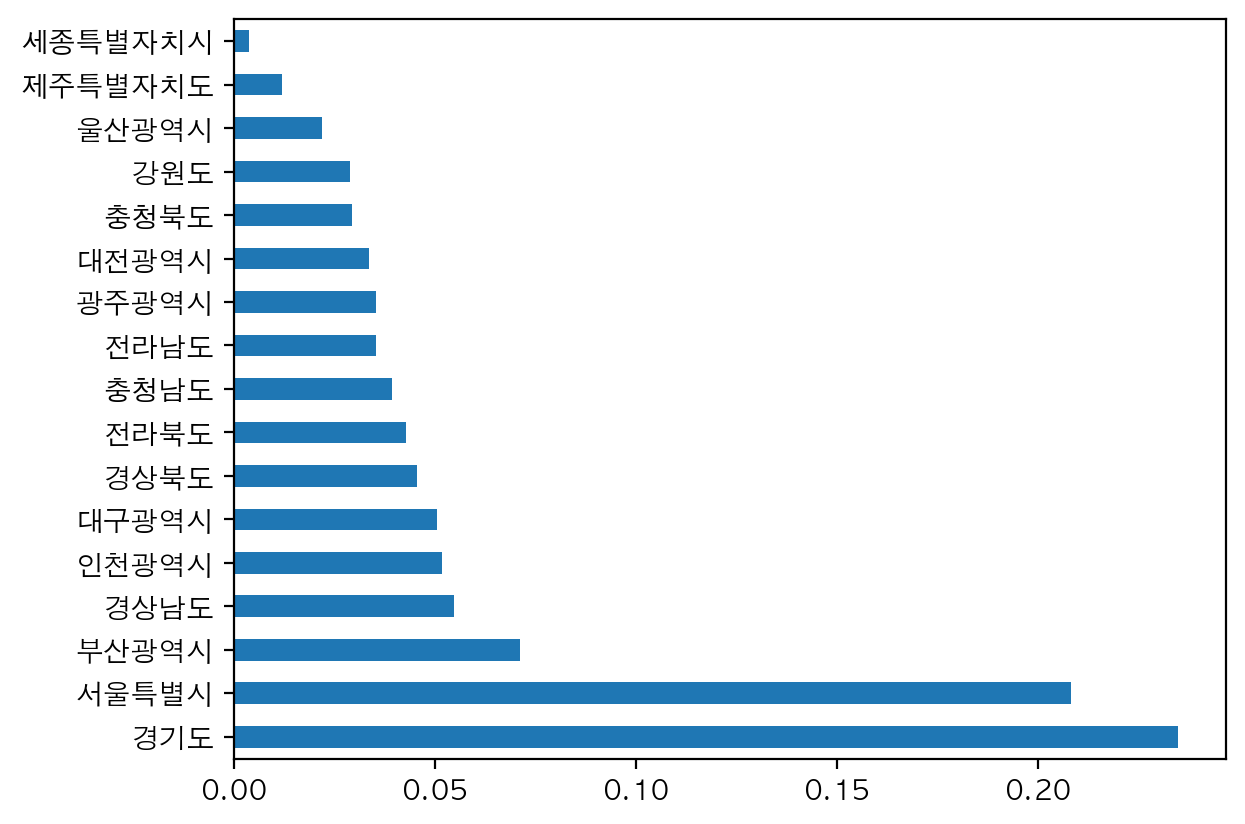

In [40]:
city.plot.barh() #막대그래프가 더 적절한 시각화

<Axes: ylabel='시도명'>

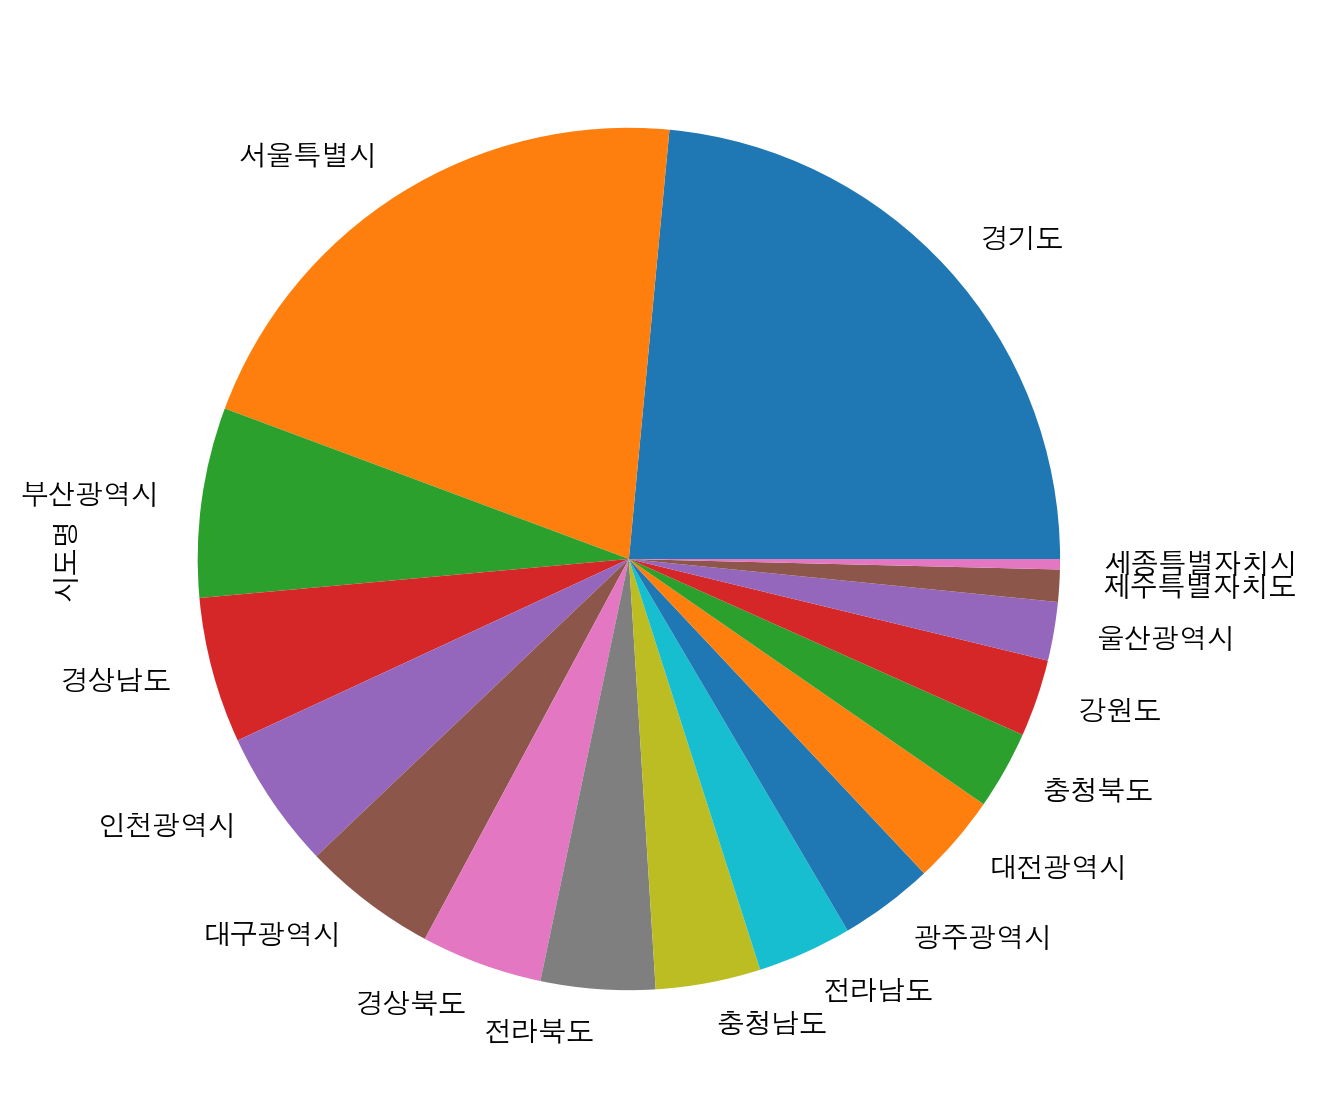

In [41]:
city.plot.pie(figsize=(7,7))

<Axes: ylabel='시도명'>

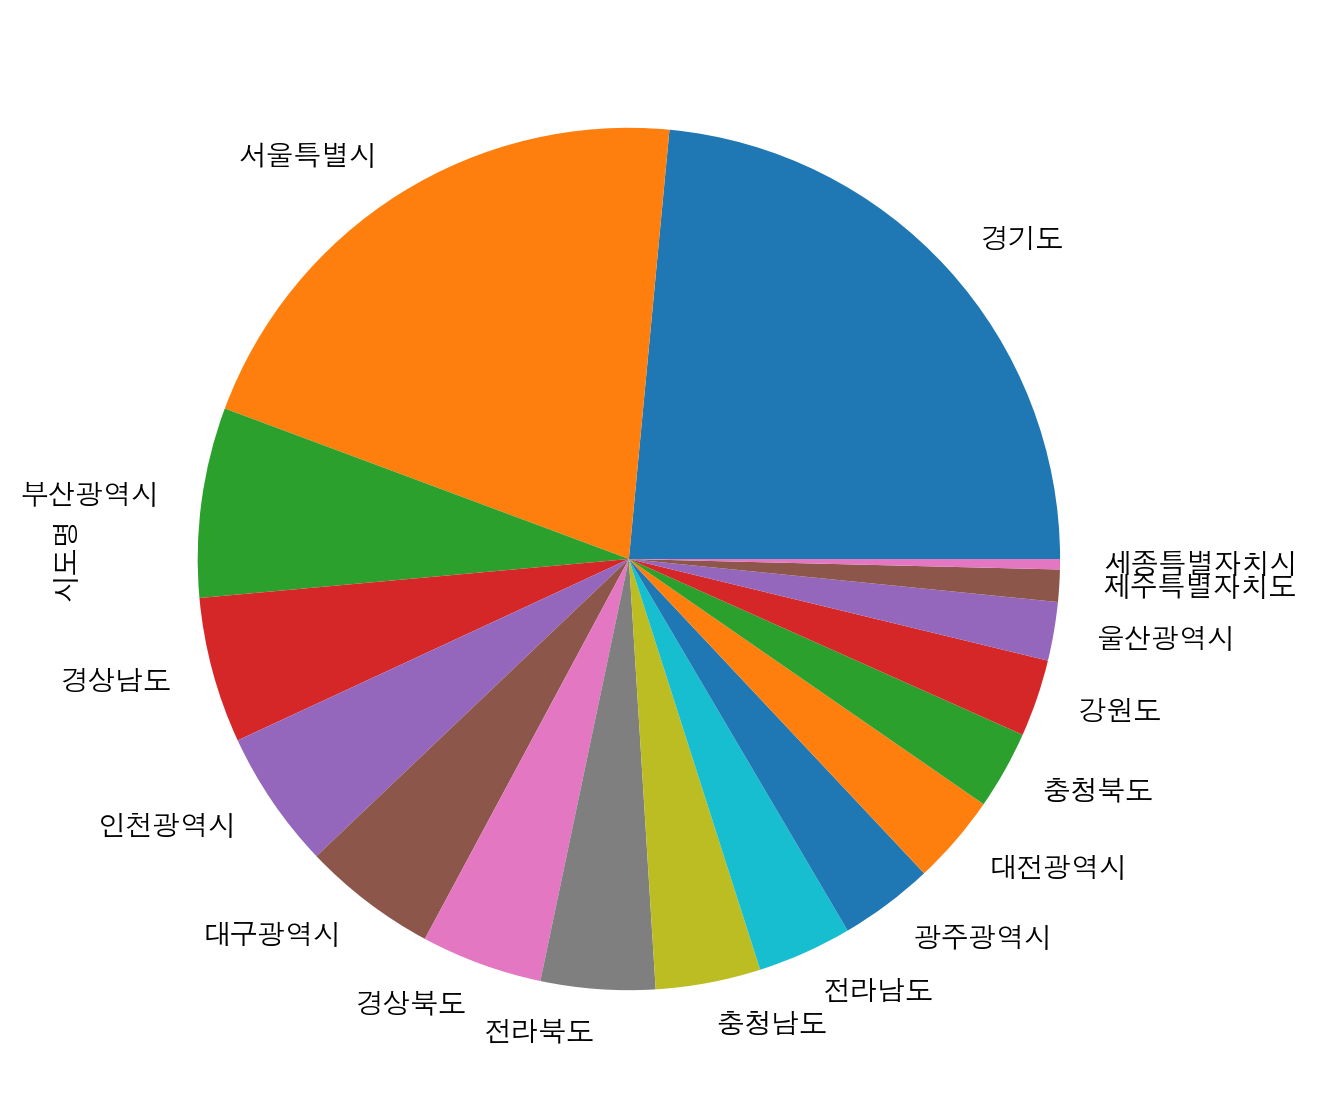

In [42]:
city_normalize.plot.pie(figsize=(7,7))

<Axes: xlabel='count', ylabel='시도명'>

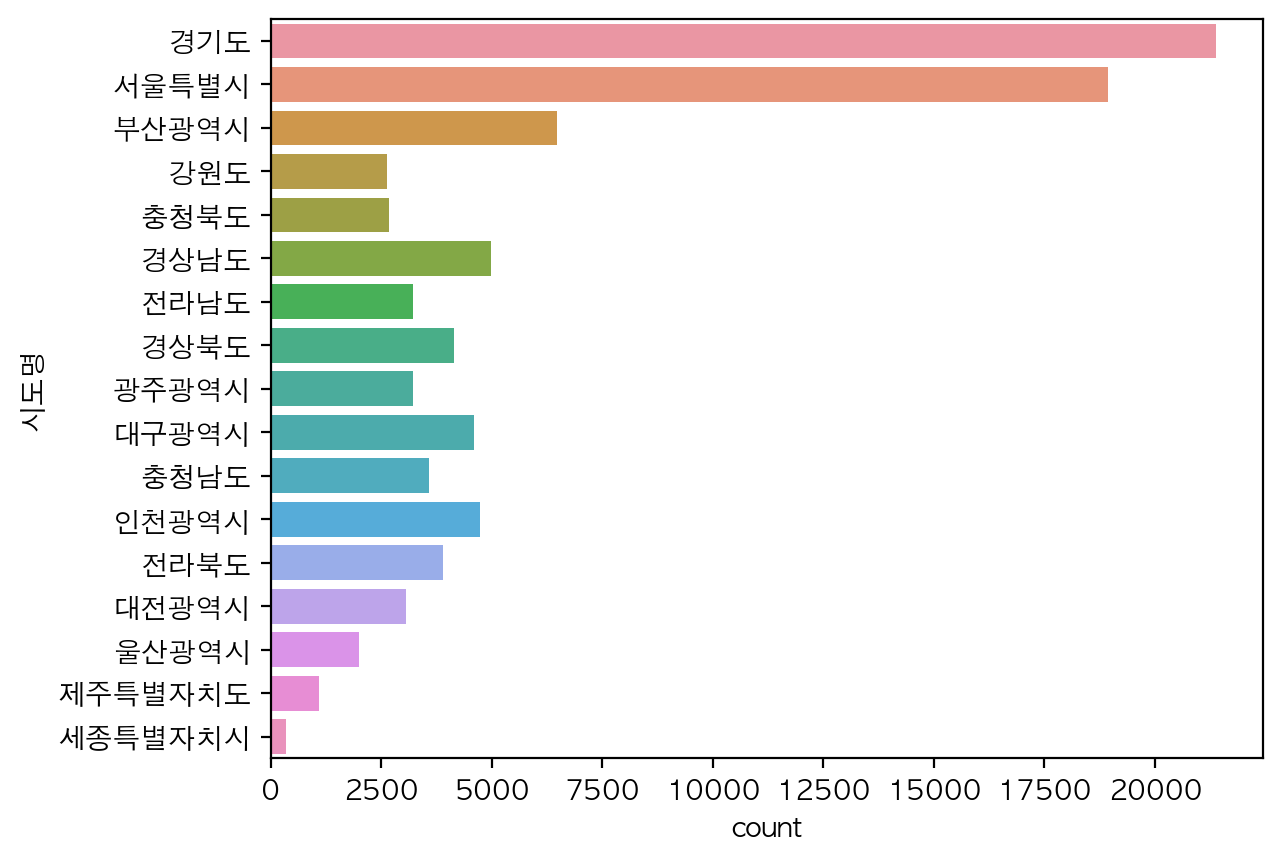

In [43]:
sns.countplot(data=df,y='시도명')
#seaborn에서는 다양한 시각화를 지원한다는 장점이 있지만 / 속도가 느리다는 장점이 있음

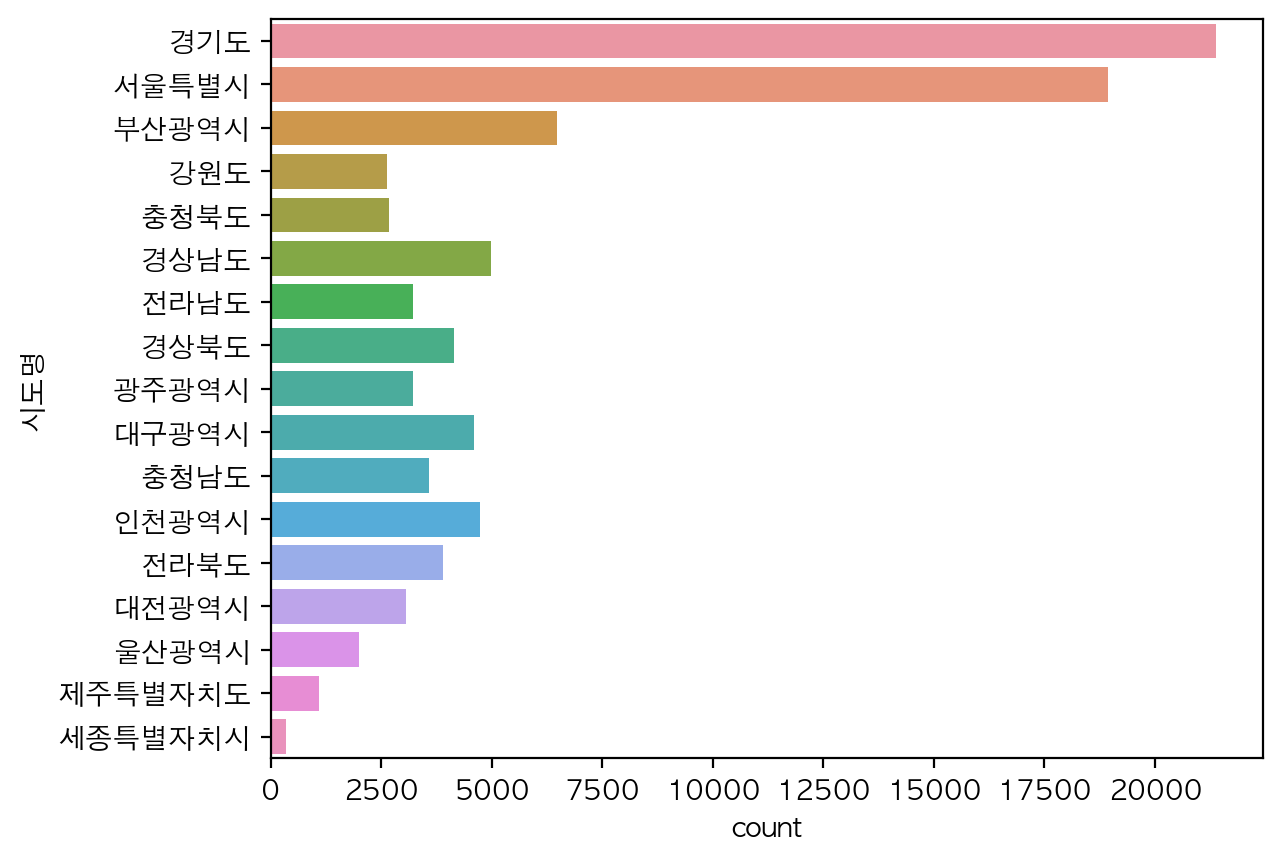

In [44]:
c=sns.countplot(data=df,y='시도명') #변수에 집어 넣으면 그래프 위에 글자 제거

In [45]:
df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [46]:
c=df['상권업종중분류명'].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [47]:
n=df['상권업종중분류명'].value_counts(normalize=True)

<Axes: >

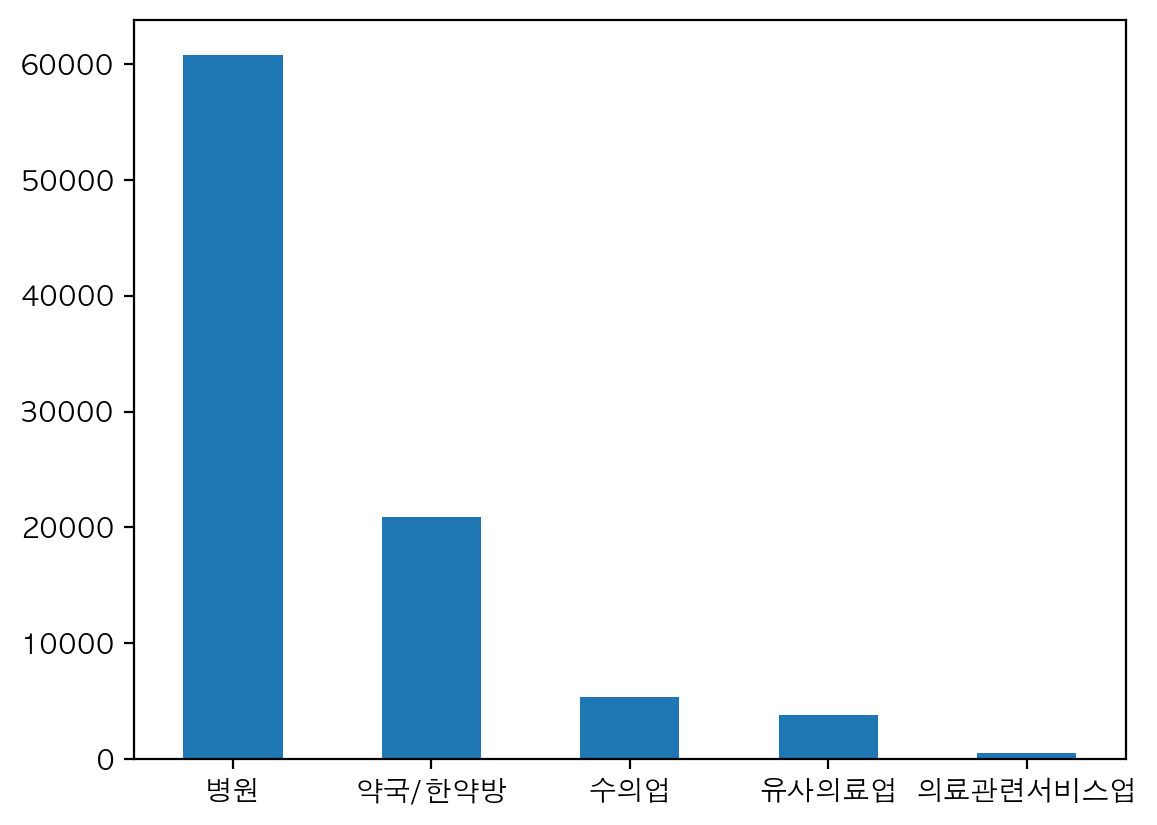

In [48]:
c.plot.bar(rot=0) #글씨 똑바로 하기

<Axes: ylabel='상권업종중분류명'>

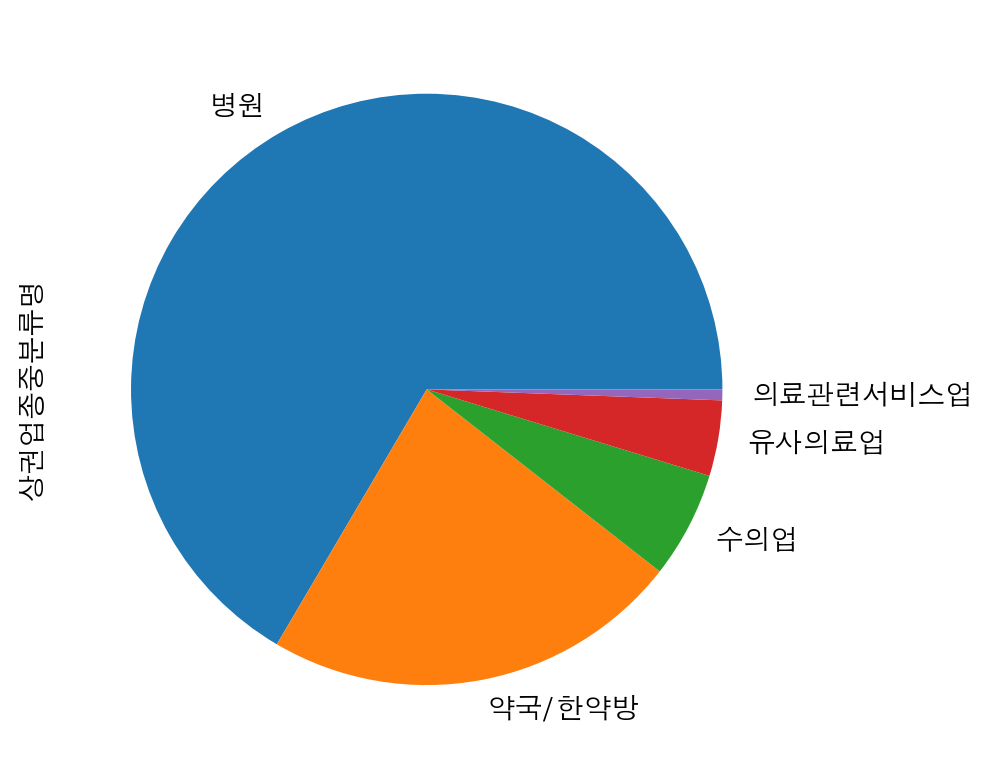

In [49]:
n.plot.pie()

In [50]:
c=df['상권업종소분류명'].value_counts()

<Axes: >

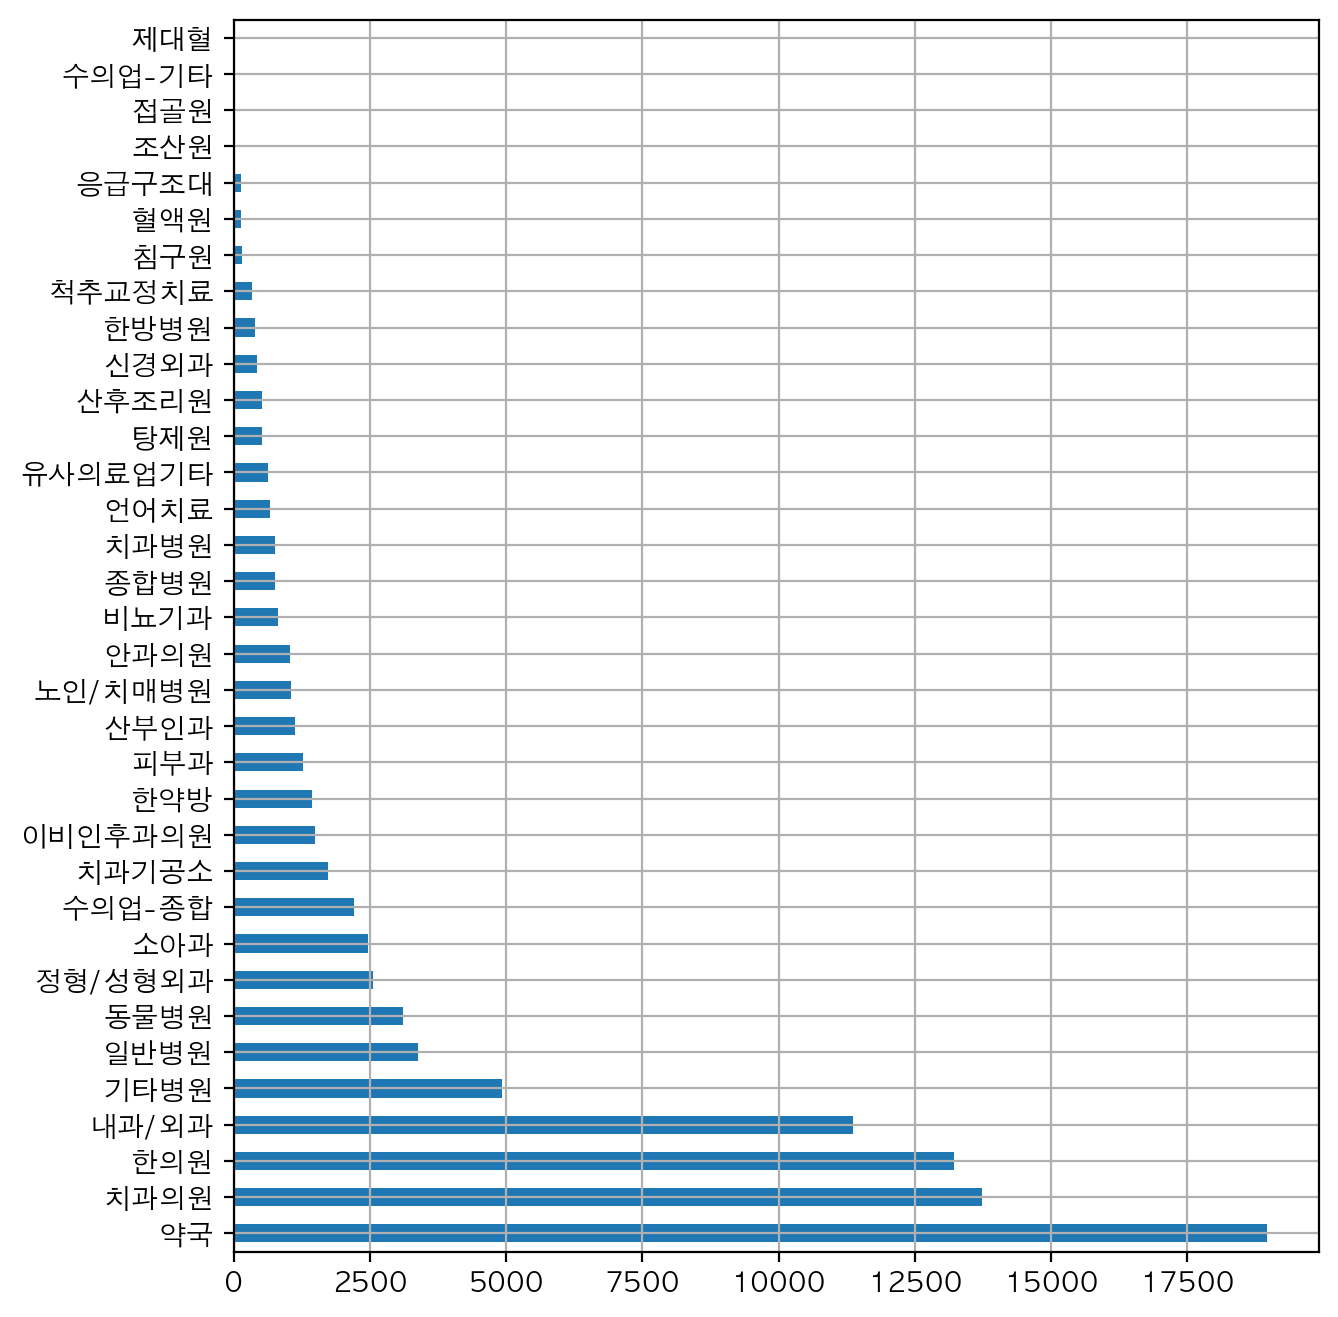

In [51]:
c.plot.barh(figsize=(7,8),grid=True) #격차생성

# 데이터 색인하기

In [52]:
df['상권업종중분류명']=='약국/한약방' #불함수로 표현되고있음

0        False
1        False
2        False
3        False
4         True
         ...  
91330     True
91331    False
91332    False
91333    False
91334    False
Name: 상권업종중분류명, Length: 91335, dtype: bool

In [53]:
df_medical=df[df['상권업종중분류명']=='약국/한약방'].copy()
df_medical.head(1)

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
4  20364049  더블유스토어수지점         S       의료       S02   약국/한약방    S02A01   

  상권업종소분류명  시도명    시군구코드  ...                    지번주소         도로명코드  \
4       약국  경기도  41465.0  ...  경기도 용인시 수지구 풍덕천동 712-2  414653205024   

               도로명  건물본번지                     건물관리번호               도로명주소  \
4  경기도 용인시 수지구 문정로     32  4146510100107120002026238  경기도 용인시 수지구 문정로 32   

      구우편번호    신우편번호          경도         위도  
4  448170.0  16837.0  127.095522  37.323528  

[1 rows x 29 columns]

In [54]:
df['상권업종대분류명']=='의료'

0        True
1        True
2        True
3        True
4        True
         ... 
91330    True
91331    True
91332    True
91333    True
91334    True
Name: 상권업종대분류명, Length: 91335, dtype: bool

In [55]:
df.loc[df['상권업종대분류명']=='의료']['상권업종중분류명'] #행과열을 함께 가져오기 

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [56]:
df.loc[df['상권업종대분류명']=='의료','상권업종중분류명'] #행과열을 함께 가져오기 #속도가 빠르기 때문에,로 이어주는 것 더선호함

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [57]:
df[df['상권업종대분류명']=='의료']['상권업종중분류명']

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [58]:
df.loc[df['상권업종대분류명']=='의료','상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [59]:
m=df['상권업종대분류명']=='의료'
m

0        True
1        True
2        True
3        True
4        True
         ... 
91330    True
91331    True
91332    True
91333    True
91334    True
Name: 상권업종대분류명, Length: 91335, dtype: bool

In [60]:
df_medi=df[df['상권업종중분류명']=='유사의료업']
df_medi.shape

(3774, 29)

In [61]:
df['상호명'].value_counts().head(10) #메소드를 이어주는 것을 메소드 체이닝 이라고 한다,.

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [62]:
df_medi

상가업소번호         상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
22     21013731    세종언어치료센터         S       의료       S03    유사의료업    S03B07   
40     20933900     고려수지침학회         S       의료       S03    유사의료업    S03B03   
97     21717820         청명원         S       의료       S03    유사의료업    S03B09   
102    21865854    응급환자이송센터         S       의료       S03    유사의료업    S03B01   
108    21914637  태화아동발달지원센터         S       의료       S03    유사의료업    S03B07   
...         ...         ...       ...      ...       ...      ...       ...   
91300  16131218     으뜸치과기공소         S       의료       S03    유사의료업    S03B06   
91310  16199325     보령치과기공소         S       의료       S03    유사의료업    S03B06   
91311  16199088       점프셈교실         S       의료       S03    유사의료업    S03B09   
91319  16108560  씨앤디자인치과기공소         S       의료       S03    유사의료업    S03B06   
91327  16190388       오피스알파         S       의료       S03    유사의료업    S03B06   

      상권업종소분류명    시도명    시군구코드  ...                     지번주소         도로명코드  \
22        언어치료  부산광역시  26410.0  ...       부산광역시 금정구 구서동 84-1  264102000010   
40         침구원   경상남도  48123.0  ...     경상남도 창원시 성산구 상남동 5-2  481234784088   
97     유사의료업기타   충청북도  43760.0  ...     충청북도 괴산군 청안면 금신리 241  437604538132   
102      응급구조대  대전광역시  30140.0  ...     대전광역시 중구 대사동 248-237  301404295026   
108       언어치료  대전광역시  30140.0  ...          대전광역시 중구 문화동 27  301404295402   
...        ...    ...      ...  ...                      ...           ...   
91300    치과기공소   경상남도  48170.0  ...       경상남도 진주시 수정동 39-11  481704797625   
91310    치과기공소  서울특별시  11290.0  ...  서울특별시 성북구 동소문동4가 103-11  112903107003   
91311  유사의료업기타   경상북도  47130.0  ...         경상북도 경주시 황성동 446  471304715895   
91319    치과기공소  서울특별시  11545.0  ...      서울특별시 금천구 가산동 60-25  115453116013   
91327    치과기공소    경기도  41173.0  ...   경기도 안양시 동안구 호계동 970-24  411734349013   

                         도로명  건물본번지                     건물관리번호  \
22            부산광역시 금정구 중앙대로   1817  2641010700100840001017686   
40      경상남도 창원시 성산구 마디미로4번길      9  4812312700100050002026799   
97        충청북도 괴산군 청안면 금신로1길     93  4376037022102410000007293   
102        대전광역시 중구 계룡로921번길     40  3014011000102480237013097   
108       대전광역시 중구 보문산로333번길     29  3014011600100270000008172   
...                      ...    ...                        ...   
91300       경상남도 진주시 향교로18번길      8  4817011600100390011004490   
91310         서울특별시 성북구 동소문로     47  1129010700101030014050661   
91311      경상북도 경주시 용담로104번길     16  4713012400104460000024894   
91319          서울특별시 금천구 벚꽃로    234  1154510100100600025000001   
91327  경기도 안양시 동안구 경수대로507번길     28  4117310400109700024005182   

                          도로명주소     구우편번호    신우편번호          경도         위도  
22       부산광역시 금정구 중앙대로 1817-11  609310.0  46273.0  129.091662  35.246528  
40       경상남도 창원시 성산구 마디미로4번길 9  642832.0  51495.0  128.684678  35.224113  
97        충청북도 괴산군 청안면 금신로1길 93  367831.0  28050.0  127.635740  36.768935  
102        대전광역시 중구 계룡로921번길 40  301846.0  34946.0  127.417693  36.321801  
108       대전광역시 중구 보문산로333번길 29  301130.0  35020.0  127.412725  36.312953  
...                         ...       ...      ...         ...        ...  
91300        경상남도 진주시 향교로18번길 8  660180.0  52753.0  128.084600  35.197029  
91310      서울특별시 성북구 동소문로 47-15  136821.0   2832.0  127.010602  37.591455  
91311      경상북도 경주시 용담로104번길 16  780954.0  38084.0  129.211755  35.865600  
91319         서울특별시 금천구 벚꽃로 234  153798.0   8513.0  126.886122  37.475986  
91327  경기도 안양시 동안구 경수대로507번길 28  431849.0  14120.0  126.956365  37.367779  

[3774 rows x 29 columns]

In [63]:
df_medi['상호명'].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

In [64]:
#여러 조건으로 색인해보기

In [65]:
(df['상권업종소분류명']=='약국') & (df['시도명']=='서울특별시') #and일 떼 오류발생

0        False
1        False
2        False
3        False
4        False
         ...  
91330    False
91331    False
91332    False
91333    False
91334    False
Length: 91335, dtype: bool

In [66]:
#색인하기
df[(df['상권업종소분류명']=='약국') & (df['시도명']=='서울특별시')]

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
33     20816709      이즈타워약         S       의료       S02   약국/한약방    S02A01   
51     20855710       진흥약국         S       의료       S02   약국/한약방    S02A01   
130    21589838      신세계약국         S       의료       S02   약국/한약방    S02A01   
136    22388303    메디팜한솔약국         S       의료       S02   약국/한약방    S02A01   
141    22412563        명약국         S       의료       S02   약국/한약방    S02A01   
...         ...        ...       ...      ...       ...      ...       ...   
91239  16131547     우리이웃약국         S       의료       S02   약국/한약방    S02A01   
91275  16195709     더블유스토어         S       의료       S02   약국/한약방    S02A01   
91288  16131839      종각팜약국         S       의료       S02   약국/한약방    S02A01   
91301  16188650      온누리약국         S       의료       S02   약국/한약방    S02A01   
91322  16091491  설연화한복감성약방         S       의료       S02   약국/한약방    S02A01   

      상권업종소분류명    시도명    시군구코드  ...                    지번주소         도로명코드  \
33          약국  서울특별시  11680.0  ...       서울특별시 강남구 역삼동 821  116803122010   
51          약국  서울특별시  11740.0  ...       서울특별시 강동구 둔촌동 630  117403124002   
130         약국  서울특별시  11260.0  ...       서울특별시 중랑구 신내동 646  112603106007   
136         약국  서울특별시  11200.0  ...       서울특별시 성동구 행당동 346  112003103006   
141         약국  서울특별시  11230.0  ...  서울특별시 동대문구 휘경동 286-121  112304115120   
...        ...    ...      ...  ...                     ...           ...   
91239       약국  서울특별시  11290.0  ...      서울특별시 성북구 종암동 34-3  112904121682   
91275       약국  서울특별시  11530.0  ...       서울특별시 구로구 구로동 501  115303116005   
91288       약국  서울특별시  11110.0  ...     서울특별시 종로구 종로2가 84-8  111103100013   
91301       약국  서울특별시  11530.0  ...    서울특별시 구로구 구로동 798-30  115304148329   
91322       약국  서울특별시  11260.0  ...      서울특별시 중랑구 묵동 174-1  112603005050   

                      도로명  건물본번지                     건물관리번호  \
33         서울특별시 강남구 테헤란로    101  1168010100108210001000001   
51          서울특별시 강동구 명일로    172  1174010600106090000000001   
130         서울특별시 중랑구 신내로    211  1126010600106460000000300   
136         서울특별시 성동구 행당로     82  1120010700103460012016935   
141    서울특별시 동대문구 망우로18나길      3  1123010900102860121007257   
...                   ...    ...                        ...   
91239     서울특별시 성북구 종암로5길     26  1129013500100340003022753   
91275     서울특별시 구로구 구로중앙로    134  1153010200105010000000001   
91288        서울특별시 종로구 종로     68  1111013800100160006014311   
91301   서울특별시 구로구 디지털로27길    116  1153010200107980032000001   
91322       서울특별시 중랑구 공릉로     28  1126010400101740001009985   

                       도로명주소     구우편번호   신우편번호          경도         위도  
33        서울특별시 강남구 테헤란로 101  135080.0  6134.0  127.028023  37.498656  
51         서울특별시 강동구 명일로 172  134767.0  5360.0  127.145055  37.534135  
130        서울특별시 중랑구 신내로 211  131130.0  2024.0  127.092597  37.616424  
136         서울특별시 성동구 행당로 82  133777.0  4717.0  127.027513  37.556238  
141     서울특별시 동대문구 망우로18나길 3  130090.0  2498.0  127.060556  37.587349  
...                      ...       ...     ...         ...        ...  
91239     서울특별시 성북구 종암로5길 26  136769.0  2811.0  127.033908  37.594792  
91275    서울특별시 구로구 구로중앙로 134  152731.0  8293.0  126.884285  37.499936  
91288        서울특별시 종로구 종로 68  110122.0  3189.0  126.984930  37.569882  
91301  서울특별시 구로구 디지털로27길 116  152875.0  8374.0  126.888070  37.484897  
91322       서울특별시 중랑구 공릉로 28  131848.0  2034.0  127.078082  37.613194  

[3579 rows x 29 columns]

In [67]:
df_seoul_drug=df[(df['상권업종소분류명']=='약국') & (df['시도명']=='서울특별시')]
print(df_seoul_drug.shape)
df_seoul_drug

#여러 줄을 출력할 때는 가장 아래 줄을 출력하기 때문에 print를 중간에 사용해 여러 줄을 출력 가능하다

(3579, 29)


상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
33     20816709      이즈타워약         S       의료       S02   약국/한약방    S02A01   
51     20855710       진흥약국         S       의료       S02   약국/한약방    S02A01   
130    21589838      신세계약국         S       의료       S02   약국/한약방    S02A01   
136    22388303    메디팜한솔약국         S       의료       S02   약국/한약방    S02A01   
141    22412563        명약국         S       의료       S02   약국/한약방    S02A01   
...         ...        ...       ...      ...       ...      ...       ...   
91239  16131547     우리이웃약국         S       의료       S02   약국/한약방    S02A01   
91275  16195709     더블유스토어         S       의료       S02   약국/한약방    S02A01   
91288  16131839      종각팜약국         S       의료       S02   약국/한약방    S02A01   
91301  16188650      온누리약국         S       의료       S02   약국/한약방    S02A01   
91322  16091491  설연화한복감성약방         S       의료       S02   약국/한약방    S02A01   

      상권업종소분류명    시도명    시군구코드  ...                    지번주소         도로명코드  \
33          약국  서울특별시  11680.0  ...       서울특별시 강남구 역삼동 821  116803122010   
51          약국  서울특별시  11740.0  ...       서울특별시 강동구 둔촌동 630  117403124002   
130         약국  서울특별시  11260.0  ...       서울특별시 중랑구 신내동 646  112603106007   
136         약국  서울특별시  11200.0  ...       서울특별시 성동구 행당동 346  112003103006   
141         약국  서울특별시  11230.0  ...  서울특별시 동대문구 휘경동 286-121  112304115120   
...        ...    ...      ...  ...                     ...           ...   
91239       약국  서울특별시  11290.0  ...      서울특별시 성북구 종암동 34-3  112904121682   
91275       약국  서울특별시  11530.0  ...       서울특별시 구로구 구로동 501  115303116005   
91288       약국  서울특별시  11110.0  ...     서울특별시 종로구 종로2가 84-8  111103100013   
91301       약국  서울특별시  11530.0  ...    서울특별시 구로구 구로동 798-30  115304148329   
91322       약국  서울특별시  11260.0  ...      서울특별시 중랑구 묵동 174-1  112603005050   

                      도로명  건물본번지                     건물관리번호  \
33         서울특별시 강남구 테헤란로    101  1168010100108210001000001   
51          서울특별시 강동구 명일로    172  1174010600106090000000001   
130         서울특별시 중랑구 신내로    211  1126010600106460000000300   
136         서울특별시 성동구 행당로     82  1120010700103460012016935   
141    서울특별시 동대문구 망우로18나길      3  1123010900102860121007257   
...                   ...    ...                        ...   
91239     서울특별시 성북구 종암로5길     26  1129013500100340003022753   
91275     서울특별시 구로구 구로중앙로    134  1153010200105010000000001   
91288        서울특별시 종로구 종로     68  1111013800100160006014311   
91301   서울특별시 구로구 디지털로27길    116  1153010200107980032000001   
91322       서울특별시 중랑구 공릉로     28  1126010400101740001009985   

                       도로명주소     구우편번호   신우편번호          경도         위도  
33        서울특별시 강남구 테헤란로 101  135080.0  6134.0  127.028023  37.498656  
51         서울특별시 강동구 명일로 172  134767.0  5360.0  127.145055  37.534135  
130        서울특별시 중랑구 신내로 211  131130.0  2024.0  127.092597  37.616424  
136         서울특별시 성동구 행당로 82  133777.0  4717.0  127.027513  37.556238  
141     서울특별시 동대문구 망우로18나길 3  130090.0  2498.0  127.060556  37.587349  
...                      ...       ...     ...         ...        ...  
91239     서울특별시 성북구 종암로5길 26  136769.0  2811.0  127.033908  37.594792  
91275    서울특별시 구로구 구로중앙로 134  152731.0  8293.0  126.884285  37.499936  
91288        서울특별시 종로구 종로 68  110122.0  3189.0  126.984930  37.569882  
91301  서울특별시 구로구 디지털로27길 116  152875.0  8374.0  126.888070  37.484897  
91322       서울특별시 중랑구 공릉로 28  131848.0  2034.0  127.078082  37.613194  

[3579 rows x 29 columns]

# --------

In [68]:
c=df_seoul_drug['시군구명'].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [69]:
n=df_seoul_drug['시군구명'].value_counts(normalize=True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

<Axes: >

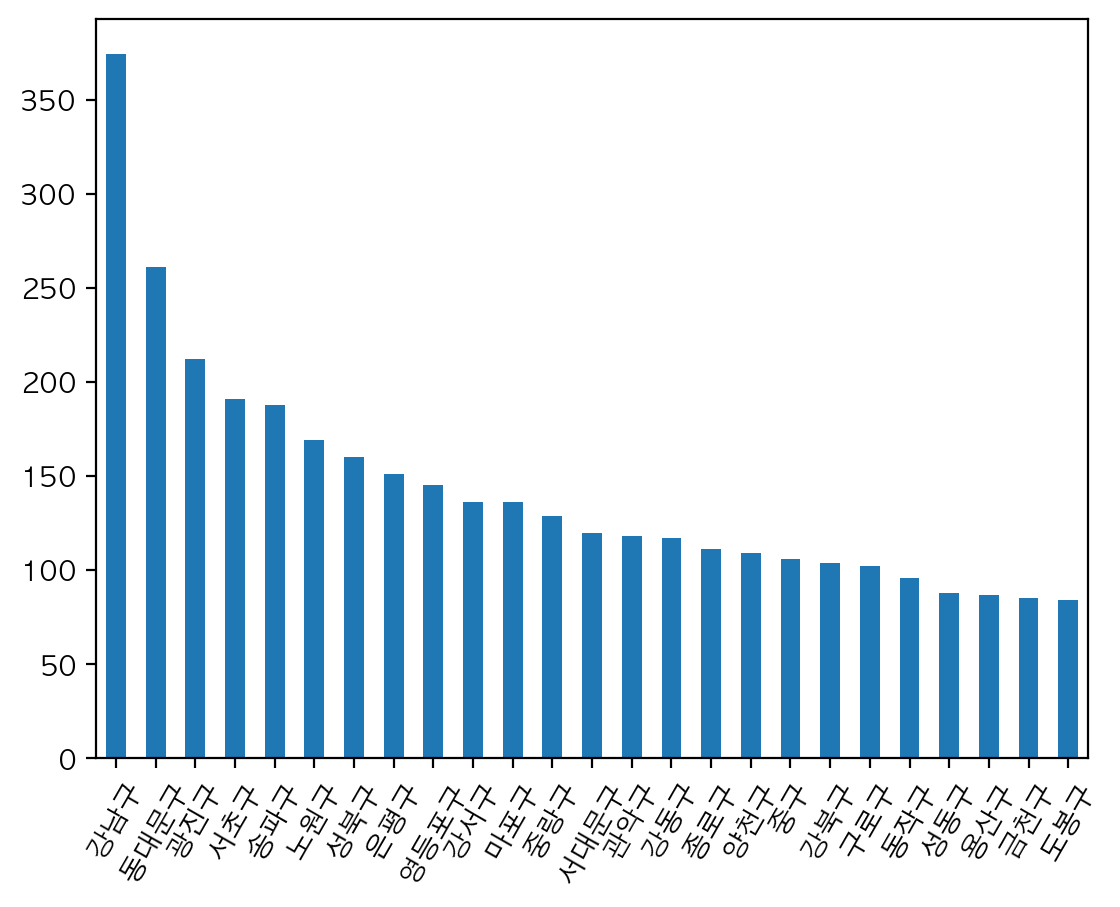

In [70]:
c.plot.bar(rot=60)

In [71]:
df['상권업종소분류명']=='종합병원'

0        False
1        False
2        False
3        False
4        False
         ...  
91330    False
91331    False
91332    False
91333    False
91334    False
Name: 상권업종소분류명, Length: 91335, dtype: bool

In [72]:
df[(df['상권업종소분류명']=='종합병원') & (df['시도명']=='서울특별시')] #연산자 우선순위 때문에 괄호를 적어햐함

상가업소번호               상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
305    25155642            대진의료재단         S       의료       S01       병원   
353    20471487            홍익병원별관         S       의료       S01       병원   
385    20737057              SNUH         S       의료       S01       병원   
1917   23210677  평화드림여의도성모병원의료기매장         S       의료       S01       병원   
2461   20024045                한양         S       의료       S01       병원   
...         ...               ...       ...      ...       ...      ...   
71991  28505952      서울성모병원응급의료센터         S       의료       S01       병원   
76508  12292992             라마르의원         S       의료       S01       병원   
90492  16031909     가톨릭대학교여의도성모병원         S       의료       S01       병원   
90581  16332576              씨엠병원         S       의료       S01       병원   
90788  16162338            성베드로병원         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                  지번주소  \
305      S01B01     종합병원  서울특별시  11215.0  ...   서울특별시 광진구 중곡동 58-25   
353      S01B01     종합병원  서울특별시  11470.0  ...  서울특별시 양천구 신정동 897-13   
385      S01B01     종합병원  서울특별시  11680.0  ...  서울특별시 강남구 역삼동 736-55   
1917     S01B01     종합병원  서울특별시  11560.0  ...    서울특별시 영등포구 여의도동 62   
2461     S01B01     종합병원  서울특별시  11200.0  ...    서울특별시 성동구 행당동 15-1   
...         ...      ...    ...      ...  ...                   ...   
71991    S01B01     종합병원  서울특별시  11650.0  ...     서울특별시 서초구 반포동 505   
76508    S01B01     종합병원  서울특별시  11740.0  ...   서울특별시 강동구 천호동 453-8   
90492    S01B01     종합병원  서울특별시  11140.0  ...     서울특별시 중구 명동2가 1-1   
90581    S01B01     종합병원  서울특별시  11560.0  ...  서울특별시 영등포구 영등포동4가 90   
90788    S01B01     종합병원  서울특별시  11680.0  ...  서울특별시 강남구 도곡동 910-27   

              도로명코드                 도로명  건물본번지                     건물관리번호  \
305    112153104006      서울특별시 광진구 긴고랑로    119  1121510100100580025000733   
353    114702005008      서울특별시 양천구 국회대로    250  1147010100108970013001044   
385    116804166727   서울특별시 강남구 테헤란로26길     10  1168010100107360055027688   
1917   115603118001      서울특별시 영등포구 63로     10  1156011000100620000031477   
2461   112003103002       서울특별시 성동구 마조로     22  1120010700100150001019623   
...             ...                 ...    ...                        ...   
71991  116502121003      서울특별시 서초구 반포대로    222  1165010700101230000017226   
76508  117404172367  서울특별시 강동구 천호대로157길     18  1174010900104530021010314   
90492  111404103165        서울특별시 중구 명동길     74  1114012700100010001019574   
90581  115604154717  서울특별시 영등포구 영등포로36길     13  1156010500100900000035097   
90788  116802000003     서울특별시 강남구 남부순환로   2649  1168011800109100027000895   

                       도로명주소     구우편번호   신우편번호          경도         위도  
305       서울특별시 광진구 긴고랑로 119  143220.0  4944.0  127.088279  37.559048  
353       서울특별시 양천구 국회대로 250  158070.0  7937.0  126.862805  37.529213  
385     서울특별시 강남구 테헤란로26길 10  135080.0  6236.0  127.035825  37.499630  
1917       서울특별시 영등포구 63로 10  150713.0  7345.0  126.936693  37.518296  
2461      서울특별시 성동구 마조로 22-2  133070.0  4763.0  127.041325  37.559469  
...                      ...       ...     ...         ...        ...  
71991     서울특별시 서초구 반포대로 222  137701.0  6591.0  127.005841  37.502382  
76508  서울특별시 강동구 천호대로157길 18  134864.0  5335.0  127.127466  37.538485  
90492        서울특별시 중구 명동길 74  100809.0  4537.0  126.986758  37.563662  
90581  서울특별시 영등포구 영등포로36길 13  150030.0  7301.0  126.903857  37.518807  
90788   서울특별시 강남구 남부순환로 2649  135859.0  6271.0  127.039567  37.485604  

[91 rows x 29 columns]

In [73]:
df_seoul_hospital=df[(df['상권업종소분류명']=='종합병원') &
                     (df['시도명']=='서울특별시')].copy()
df_seoul_hospital.head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
305  25155642  대진의료재단         S       의료       S01       병원    S01B01   

    상권업종소분류명    시도명    시군구코드  ...                 지번주소         도로명코드  \
305     종합병원  서울특별시  11215.0  ...  서울특별시 광진구 중곡동 58-25  112153104006   

                도로명  건물본번지                     건물관리번호               도로명주소  \
305  서울특별시 광진구 긴고랑로    119  1121510100100580025000733  서울특별시 광진구 긴고랑로 119   

        구우편번호   신우편번호          경도         위도  
305  143220.0  4944.0  127.088279  37.559048  

[1 rows x 29 columns]

In [74]:
df_seoul_hospital['시군구명']

305       광진구
353       양천구
385       강남구
1917     영등포구
2461      성동구
         ... 
71991     서초구
76508     강동구
90492      중구
90581    영등포구
90788     강남구
Name: 시군구명, Length: 91, dtype: object

In [75]:
df_seoul_hospital['시군구명'].value_counts() #value_counts를 이용하면 그룹화 가능

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

In [76]:
df_seoul_hospital['상호명'].str.contains('종합병원') #특정 상호명을 검색하는 것

305      False
353      False
385      False
1917     False
2461     False
         ...  
71991    False
76508    False
90492    False
90581    False
90788    False
Name: 상호명, Length: 91, dtype: bool

In [77]:
~df_seoul_hospital['상호명'].str.contains('종합병원') #~ :종합 병원이 아닌 것을 가지고 오기

305      True
353      True
385      True
1917     True
2461     True
         ... 
71991    True
76508    True
90492    True
90581    True
90788    True
Name: 상호명, Length: 91, dtype: bool

In [78]:
#종압병원이 아닌 것을 가지고 오기
df_seoul_hospital[~df_seoul_hospital['상호명'].str.contains('종합병원')] 

상가업소번호               상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
305    25155642            대진의료재단         S       의료       S01       병원   
353    20471487            홍익병원별관         S       의료       S01       병원   
385    20737057              SNUH         S       의료       S01       병원   
1917   23210677  평화드림여의도성모병원의료기매장         S       의료       S01       병원   
2461   20024045                한양         S       의료       S01       병원   
...         ...               ...       ...      ...       ...      ...   
71991  28505952      서울성모병원응급의료센터         S       의료       S01       병원   
76508  12292992             라마르의원         S       의료       S01       병원   
90492  16031909     가톨릭대학교여의도성모병원         S       의료       S01       병원   
90581  16332576              씨엠병원         S       의료       S01       병원   
90788  16162338            성베드로병원         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                  지번주소  \
305      S01B01     종합병원  서울특별시  11215.0  ...   서울특별시 광진구 중곡동 58-25   
353      S01B01     종합병원  서울특별시  11470.0  ...  서울특별시 양천구 신정동 897-13   
385      S01B01     종합병원  서울특별시  11680.0  ...  서울특별시 강남구 역삼동 736-55   
1917     S01B01     종합병원  서울특별시  11560.0  ...    서울특별시 영등포구 여의도동 62   
2461     S01B01     종합병원  서울특별시  11200.0  ...    서울특별시 성동구 행당동 15-1   
...         ...      ...    ...      ...  ...                   ...   
71991    S01B01     종합병원  서울특별시  11650.0  ...     서울특별시 서초구 반포동 505   
76508    S01B01     종합병원  서울특별시  11740.0  ...   서울특별시 강동구 천호동 453-8   
90492    S01B01     종합병원  서울특별시  11140.0  ...     서울특별시 중구 명동2가 1-1   
90581    S01B01     종합병원  서울특별시  11560.0  ...  서울특별시 영등포구 영등포동4가 90   
90788    S01B01     종합병원  서울특별시  11680.0  ...  서울특별시 강남구 도곡동 910-27   

              도로명코드                 도로명  건물본번지                     건물관리번호  \
305    112153104006      서울특별시 광진구 긴고랑로    119  1121510100100580025000733   
353    114702005008      서울특별시 양천구 국회대로    250  1147010100108970013001044   
385    116804166727   서울특별시 강남구 테헤란로26길     10  1168010100107360055027688   
1917   115603118001      서울특별시 영등포구 63로     10  1156011000100620000031477   
2461   112003103002       서울특별시 성동구 마조로     22  1120010700100150001019623   
...             ...                 ...    ...                        ...   
71991  116502121003      서울특별시 서초구 반포대로    222  1165010700101230000017226   
76508  117404172367  서울특별시 강동구 천호대로157길     18  1174010900104530021010314   
90492  111404103165        서울특별시 중구 명동길     74  1114012700100010001019574   
90581  115604154717  서울특별시 영등포구 영등포로36길     13  1156010500100900000035097   
90788  116802000003     서울특별시 강남구 남부순환로   2649  1168011800109100027000895   

                       도로명주소     구우편번호   신우편번호          경도         위도  
305       서울특별시 광진구 긴고랑로 119  143220.0  4944.0  127.088279  37.559048  
353       서울특별시 양천구 국회대로 250  158070.0  7937.0  126.862805  37.529213  
385     서울특별시 강남구 테헤란로26길 10  135080.0  6236.0  127.035825  37.499630  
1917       서울특별시 영등포구 63로 10  150713.0  7345.0  126.936693  37.518296  
2461      서울특별시 성동구 마조로 22-2  133070.0  4763.0  127.041325  37.559469  
...                      ...       ...     ...         ...        ...  
71991     서울특별시 서초구 반포대로 222  137701.0  6591.0  127.005841  37.502382  
76508  서울특별시 강동구 천호대로157길 18  134864.0  5335.0  127.127466  37.538485  
90492        서울특별시 중구 명동길 74  100809.0  4537.0  126.986758  37.563662  
90581  서울특별시 영등포구 영등포로36길 13  150030.0  7301.0  126.903857  37.518807  
90788   서울특별시 강남구 남부순환로 2649  135859.0  6271.0  127.039567  37.485604  

[91 rows x 29 columns]

In [79]:
df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원'),'상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [80]:
df_seoul_hospital['상호명'].str.contains('꽃배달')

305      False
353      False
385      False
1917     False
2461     False
         ...  
71991    False
76508    False
90492    False
90581    False
90788    False
Name: 상호명, Length: 91, dtype: bool

In [81]:

df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달')]

상가업소번호            상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
2803  20895655  서울성모병원장례식장꽃배달         S       의료       S01       병원    S01B01   
4644  22020310  강남성모병원장례식장꽃배달         S       의료       S01       병원    S01B01   

     상권업종소분류명    시도명    시군구코드  ...                 지번주소         도로명코드  \
2803     종합병원  서울특별시  11650.0  ...    서울특별시 서초구 반포동 551  116504163330   
4644     종합병원  서울특별시  11650.0  ...  서울특별시 서초구 반포동 547-6  116504163242   

                    도로명  건물본번지                     건물관리번호  \
2803  서울특별시 서초구 사평대로28길     55  1165010700105510000017194   
4644  서울특별시 서초구 반포대로39길     56  1165010700105470006016762   

                        도로명주소     구우편번호   신우편번호          경도         위도  
2803     서울특별시 서초구 사평대로28길 55  137040.0  6578.0  127.000682  37.498257  
4644  서울특별시 서초구 반포대로39길 56-24  137040.0  6578.0  127.001756  37.499095  

[2 rows x 29 columns]

In [82]:
df_seoul_hospital['상호명'].str.contains('의료기')

305      False
353      False
385      False
1917      True
2461     False
         ...  
71991    False
76508    False
90492    False
90581    False
90788    False
Name: 상호명, Length: 91, dtype: bool

In [83]:
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('의료기')]

상가업소번호               상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1917  23210677  평화드림여의도성모병원의료기매장         S       의료       S01       병원   

     상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                지번주소  \
1917    S01B01     종합병원  서울특별시  11560.0  ...  서울특별시 영등포구 여의도동 62   

             도로명코드             도로명  건물본번지                     건물관리번호  \
1917  115603118001  서울특별시 영등포구 63로     10  1156011000100620000031477   

                  도로명주소     구우편번호   신우편번호          경도         위도  
1917  서울특별시 영등포구 63로 10  150713.0  7345.0  126.936693  37.518296  

[1 rows x 29 columns]

In [84]:
df_seoul_hospital['상호명'].str.contains('꽃배달|의료기|장례식장|상담소|어린이집')

305      False
353      False
385      False
1917      True
2461     False
         ...  
71991    False
76508    False
90492    False
90581    False
90788    False
Name: 상호명, Length: 91, dtype: bool

In [85]:
df_seoul_hospital[df_seoul_hospital['상호명'].
                  str.contains('꽃배달|의료기|장례식장|상담소|어린이집')]

상가업소번호                상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1917   23210677   평화드림여의도성모병원의료기매장         S       의료       S01       병원   
2803   20895655      서울성모병원장례식장꽃배달         S       의료       S01       병원   
4431   21781516       알콜중독및정신질환상담소         S       의료       S01       병원   
4644   22020310      강남성모병원장례식장꽃배달         S       의료       S01       병원   
7938   20625484          원자력병원장례식장         S       의료       S01       병원   
10283  20024377          삼성의료원장례식장         S       의료       S01       병원   
47008  21738670   가톨릭대학교성바오로병원장례식장         S       의료       S01       병원   
60645  27670796         서울성모병원어린이집         S       의료       S01       병원   
70177  11537223  한림대학교부속한강성심병원장례식장         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                      지번주소  \
1917     S01B01     종합병원  서울특별시  11560.0  ...        서울특별시 영등포구 여의도동 62   
2803     S01B01     종합병원  서울특별시  11650.0  ...         서울특별시 서초구 반포동 551   
4431     S01B01     종합병원  서울특별시  11320.0  ...       서울특별시 도봉구 창동 181-52   
4644     S01B01     종합병원  서울특별시  11650.0  ...       서울특별시 서초구 반포동 547-6   
7938     S01B01     종합병원  서울특별시  11350.0  ...       서울특별시 노원구 공릉동 215-4   
10283    S01B01     종합병원  서울특별시  11680.0  ...          서울특별시 강남구 일원동 50   
47008    S01B01     종합병원  서울특별시  11230.0  ...     서울특별시 동대문구 전농동 620-56   
60645    S01B01     종합병원  서울특별시  11650.0  ...         서울특별시 서초구 반포동 505   
70177    S01B01     종합병원  서울특별시  11560.0  ...  서울특별시 영등포구 영등포동7가 94-200   

              도로명코드                 도로명  건물본번지                     건물관리번호  \
1917   115603118001      서울특별시 영등포구 63로     10  1156011000100620000031477   
2803   116504163330   서울특별시 서초구 사평대로28길     55  1165010700105510000017194   
4431   113204127202    서울특별시 도봉구 마들로13길    153  1132010700101810052014414   
4644   116504163242   서울특별시 서초구 반포대로39길     56  1165010700105470006016762   
7938   113503110002       서울특별시 노원구 노원로     75  1135010300102150004014400   
10283  116803122009       서울특별시 강남구 일원로     81  1168011400100500000002609   
47008  112303105008      서울특별시 동대문구 왕산로    180  1123010400106200056027814   
60645  116502121003      서울특별시 서초구 반포대로    222  1165010700101230000017226   
70177  115604154428  서울특별시 영등포구 버드나루로7길     12  1156010800100940200033663   

                         도로명주소     구우편번호   신우편번호          경도         위도  
1917         서울특별시 영등포구 63로 10  150713.0  7345.0  126.936693  37.518296  
2803      서울특별시 서초구 사평대로28길 55  137040.0  6578.0  127.000682  37.498257  
4431      서울특별시 도봉구 마들로13길 153  132040.0  1411.0  127.046203  37.657046  
4644   서울특별시 서초구 반포대로39길 56-24  137040.0  6578.0  127.001756  37.499095  
7938          서울특별시 노원구 노원로 75  139706.0  1812.0  127.082670  37.628808  
10283         서울특별시 강남구 일원로 81  135710.0  6351.0  127.089579  37.490334  
47008       서울특별시 동대문구 왕산로 180  130709.0  2559.0  127.043471  37.579246  
60645       서울특별시 서초구 반포대로 222  137701.0  6591.0  127.005841  37.502382  
70177    서울특별시 영등포구 버드나루로7길 12  150030.0  7247.0  126.909676  37.523168  

[9 rows x 29 columns]

In [86]:
df_seoul_hospital[df_seoul_hospital['상호명'].
                  str.contains('꽃배달|의료기|장례식장|상담소|어린이집')].index

Int64Index([1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177], dtype='int64')

In [87]:
drop_row=df_seoul_hospital[df_seoul_hospital['상호명'].
                  str.contains('꽃배달|의료기|장례식장|상담소|어린이집')].index
drop_row=drop_row.tolist() #보기 편하게 리스트 형태로 만들기
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [88]:
df_seoul_hospital['상호명'].str.endswith('의원') #endswith

305      False
353      False
385      False
1917     False
2461     False
         ...  
71991    False
76508     True
90492    False
90581    False
90788    False
Name: 상호명, Length: 91, dtype: bool

In [89]:
df_seoul_hospital[df_seoul_hospital['상호명'].str.endswith('의원')]

상가업소번호      상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
8479    3723018     국민의원         S       의료       S01       병원    S01B01   
12854  24551577   수서제일의원         S       의료       S01       병원    S01B01   
13715  22439885    사랑의의원         S       의료       S01       병원    S01B01   
14966  20410787   창동제일의원         S       의료       S01       병원    S01B01   
16091  24550477   제일성심의원         S       의료       S01       병원    S01B01   
18047  24318286    서울이의원         S       의료       S01       병원    S01B01   
20200  24427239     독일의원         S       의료       S01       병원    S01B01   
20415  26232681   서울연합의원         S       의료       S01       병원    S01B01   
30706  24641665    실로암의원         S       의료       S01       병원    S01B01   
32889  26667863   광진성모의원         S       의료       S01       병원    S01B01   
34459  27060367   서울현대의원         S       의료       S01       병원    S01B01   
34720  27324126  이노신경과의원         S       의료       S01       병원    S01B01   
35696  24343215  송정훼밀리의원         S       의료       S01       병원    S01B01   
37251  24298799   서울중앙의원         S       의료       S01       병원    S01B01   
45120  24583753   세브란스의원         S       의료       S01       병원    S01B01   
49626  22366415   서울연세의원         S       의료       S01       병원    S01B01   
51575  24601644     성신의원         S       의료       S01       병원    S01B01   
55133  24571796   송파제일의원         S       의료       S01       병원    S01B01   
56320   7984274  카톨릭성모의원         S       의료       S01       병원    S01B01   
56404  20859679   한양성심의원         S       의료       S01       병원    S01B01   
56688  20000828   관악성모의원         S       의료       S01       병원    S01B01   
57551  24598793   우이한솔의원         S       의료       S01       병원    S01B01   
62113  22401007   북부성모의원         S       의료       S01       병원    S01B01   
76508  12292992    라마르의원         S       의료       S01       병원    S01B01   

      상권업종소분류명    시도명    시군구코드  ...                    지번주소         도로명코드  \
8479      종합병원  서울특별시  11410.0  ...  서울특별시 서대문구 북아현동 126-21  114103005057   
12854     종합병원  서울특별시  11680.0  ...       서울특별시 강남구 수서동 707  116804166081   
13715     종합병원  서울특별시  11410.0  ...    서울특별시 서대문구 충정로3가 464  114103005010   
14966     종합병원  서울특별시  11320.0  ...        서울특별시 도봉구 창동 331  113204127028   
16091     종합병원  서울특별시  11305.0  ...        서울특별시 강북구 번동 229  113054124443   
18047     종합병원  서울특별시  11230.0  ...    서울특별시 동대문구 답십리동 94-9  112303105013   
20200     종합병원  서울특별시  11215.0  ...    서울특별시 광진구 중곡동 140-19  112152000008   
20415     종합병원  서울특별시  11710.0  ...     서울특별시 송파구 잠실동 209-2  117103123009   
30706     종합병원  서울특별시  11350.0  ...       서울특별시 노원구 월계동 582  113503110008   
32889     종합병원  서울특별시  11215.0  ...   서울특별시 광진구 자양동 553-428  112153103010   
34459     종합병원  서울특별시  11500.0  ...     서울특별시 강서구 등촌동 628-3  115003005069   
34720     종합병원  서울특별시  11680.0  ...    서울특별시 강남구 신사동 600-13  116804166155   
35696     종합병원  서울특별시  11200.0  ...    서울특별시 성동구 송정동 73-608  112004109028   
37251     종합병원  서울특별시  11305.0  ...   서울특별시 강북구 미아동 1267-56  113054124223   
45120     종합병원  서울특별시  11380.0  ...     서울특별시 은평구 응암동 598-1  113803005055   
49626     종합병원  서울특별시  11215.0  ...    서울특별시 광진구 중곡동 198-11  112153005027   
51575     종합병원  서울특별시  11290.0  ...      서울특별시 성북구 길음동 1278  112903005043   
55133     종합병원  서울특별시  11710.0  ...     서울특별시 송파구 송파동 141-7  117103123014   
56320     종합병원  서울특별시  11320.0  ...       서울특별시 도봉구 쌍문동 693  113203005039   
56404     종합병원  서울특별시  11740.0  ...     서울특별시 강동구 상일동 437-5  117402000008   
56688     종합병원  서울특별시  11620.0  ...   서울특별시 관악구 봉천동 1528-27  116203120008   
57551     종합병원  서울특별시  11305.0  ...    서울특별시 강북구 수유동 279-37  113053005041   
62113     종합병원  서울특별시  11305.0  ...    서울특별시 강북구 수유동 269-20  113053005038   
76508     종합병원  서울특별시  11740.0  ...     서울특별시 강동구 천호동 453-8  117404172367   

                      도로명  건물본번지                     건물관리번호  \
8479       서울특별시 서대문구 신촌로    277  1141011000101260021028108   
12854    서울특별시 강남구 광평로51길     49  1168011500107070000001

In [90]:
drop_row2=df_seoul_hospital[df_seoul_hospital['상호명'].str.endswith('의원')].index
drop_row2=drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [91]:
drop_row=drop_row+drop_row2
len(drop_row) #종합병원으로 보기 어려운 경우

33

In [92]:
print(df_seoul_hospital.shape)
df_seoul_hospital=df_seoul_hospital.drop(drop_row,axis=0)
print(df_seoul_hospital.shape) 

(91, 29)
(58, 29)


<Axes: >

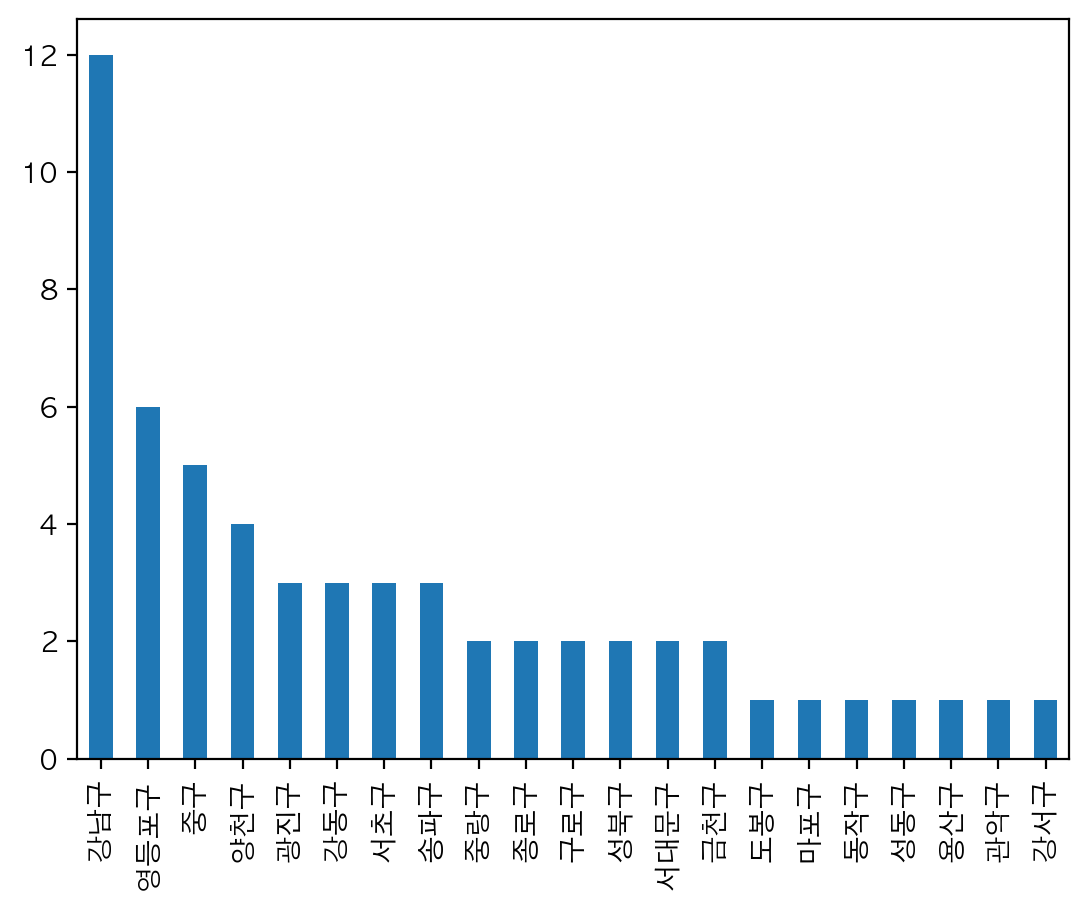

In [93]:
df_seoul_hospital['시군구명'].value_counts().plot.bar()

<Axes: xlabel='시군구명', ylabel='count'>

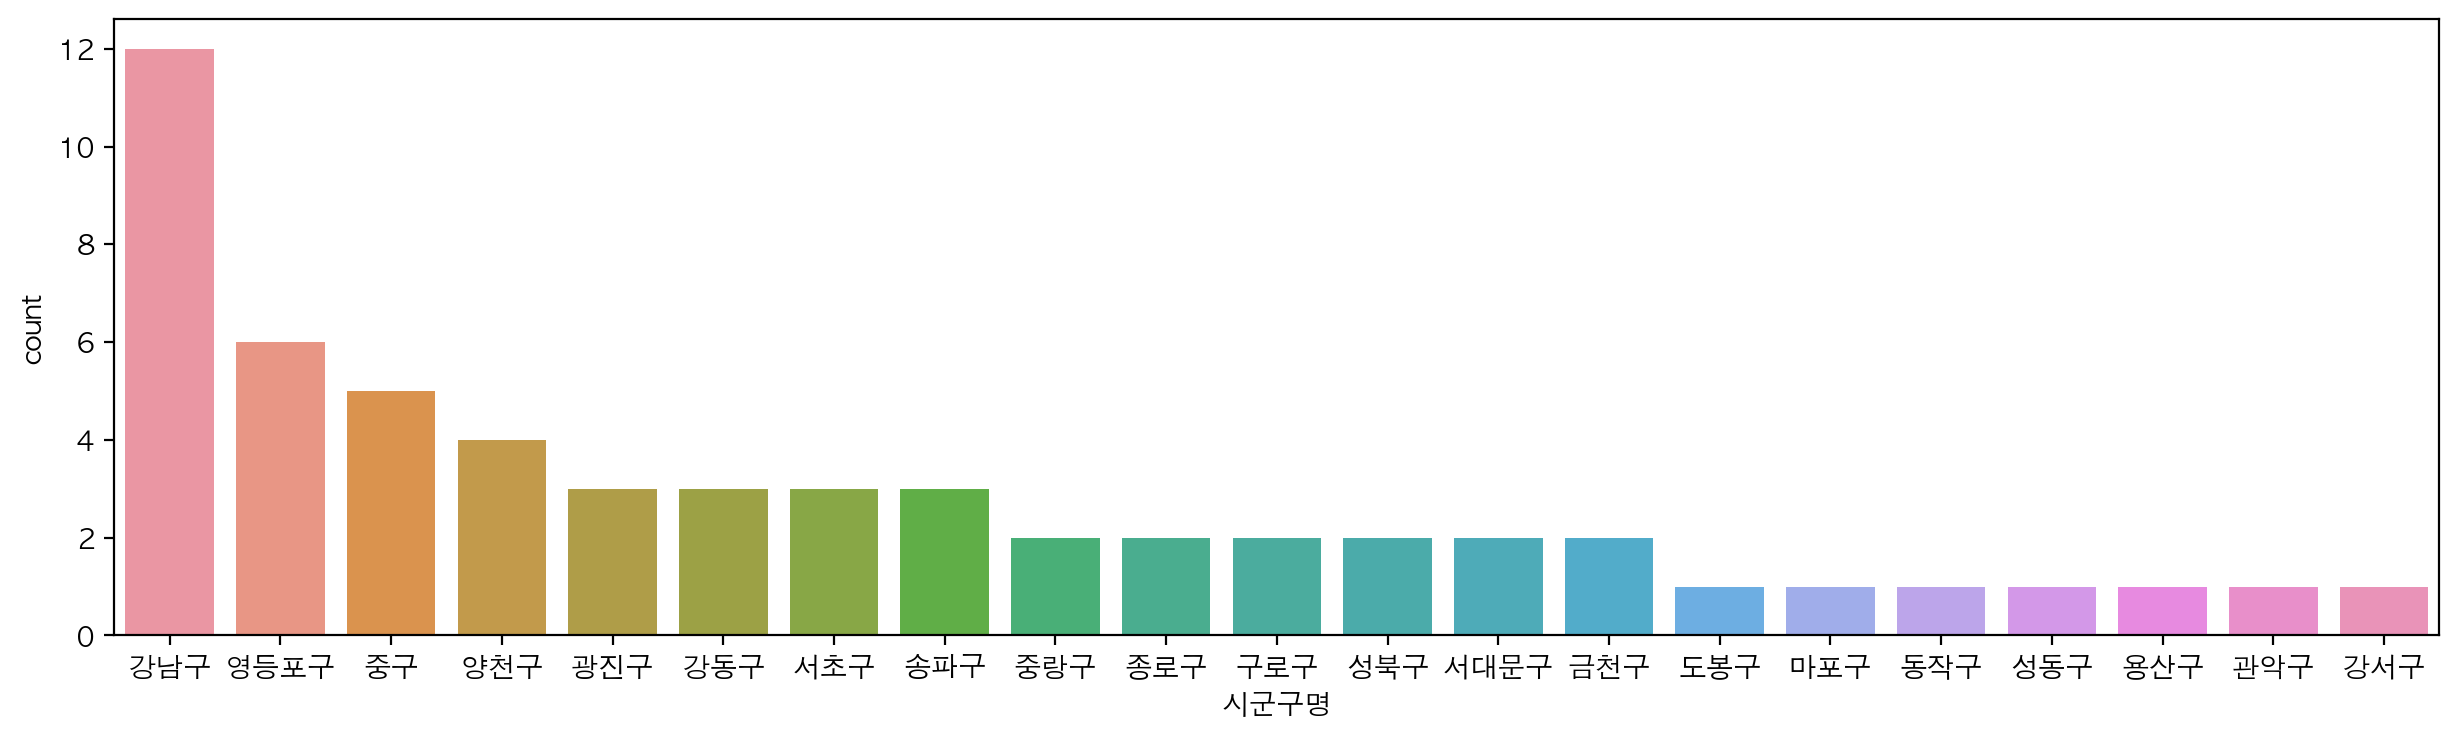

In [94]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital,x='시군구명',order=df_seoul_hospital['시군구명'].
             value_counts().index) #순서대로 그래프 시각화하기

In [95]:
df_seoul_hospital['상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

In [96]:
df_seoul=df[df['시도명']=='서울특별시'].copy()
df_seoul.shape

(18943, 29)

In [97]:
df_seoul['시도명'].value_counts()

서울특별시    18943
Name: 시도명, dtype: int64

<Axes: >

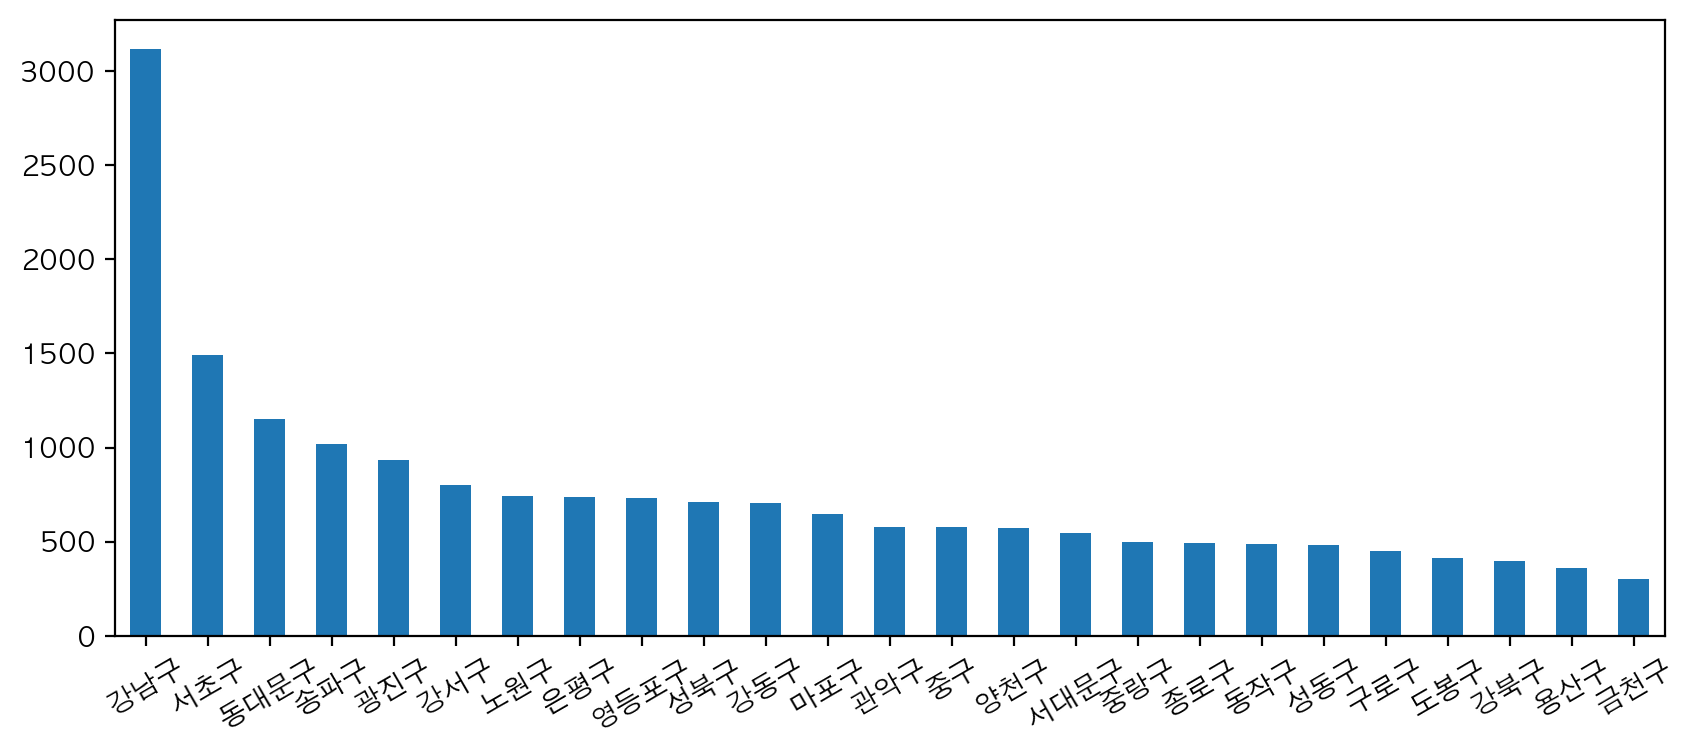

In [98]:
df_seoul['시군구명'].value_counts().plot.bar(figsize=(10,4),rot=30)

<Axes: xlabel='시군구명', ylabel='count'>

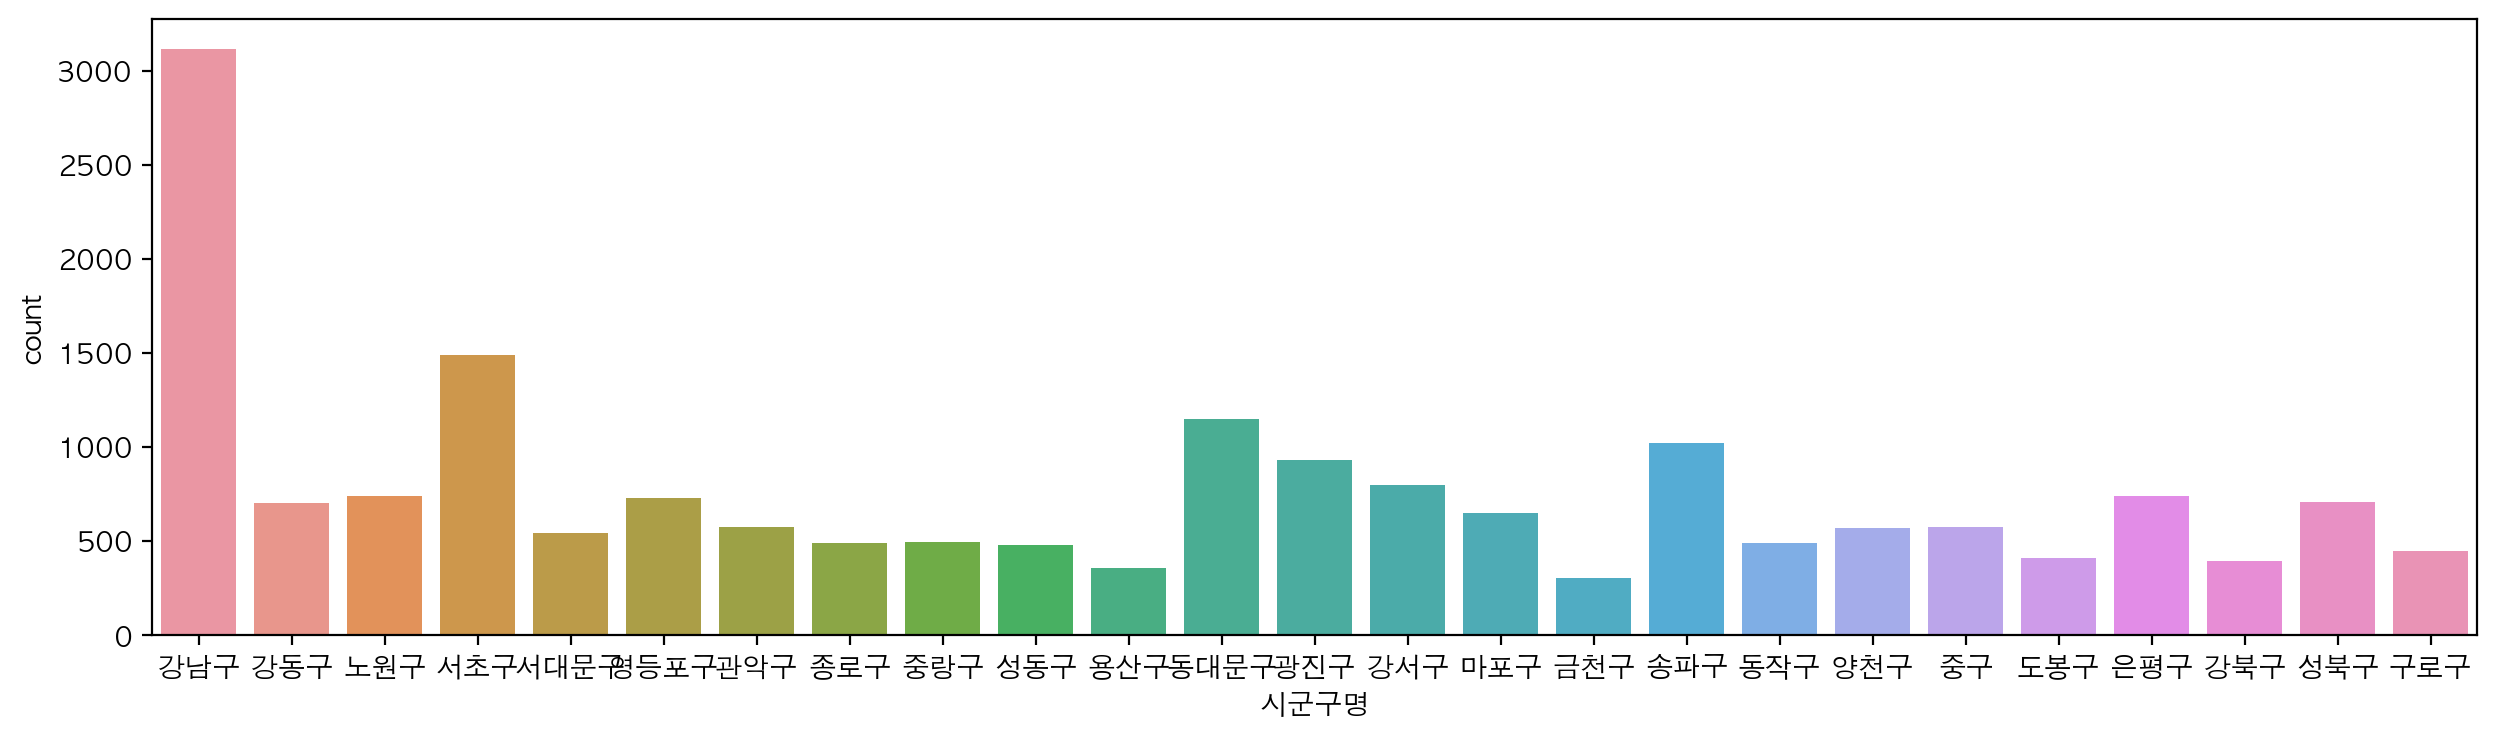

In [99]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul,x='시군구명') #coiuntplot은 x축 y축 중 하나만 지정하면 된다

<Axes: xlabel='경도', ylabel='위도'>

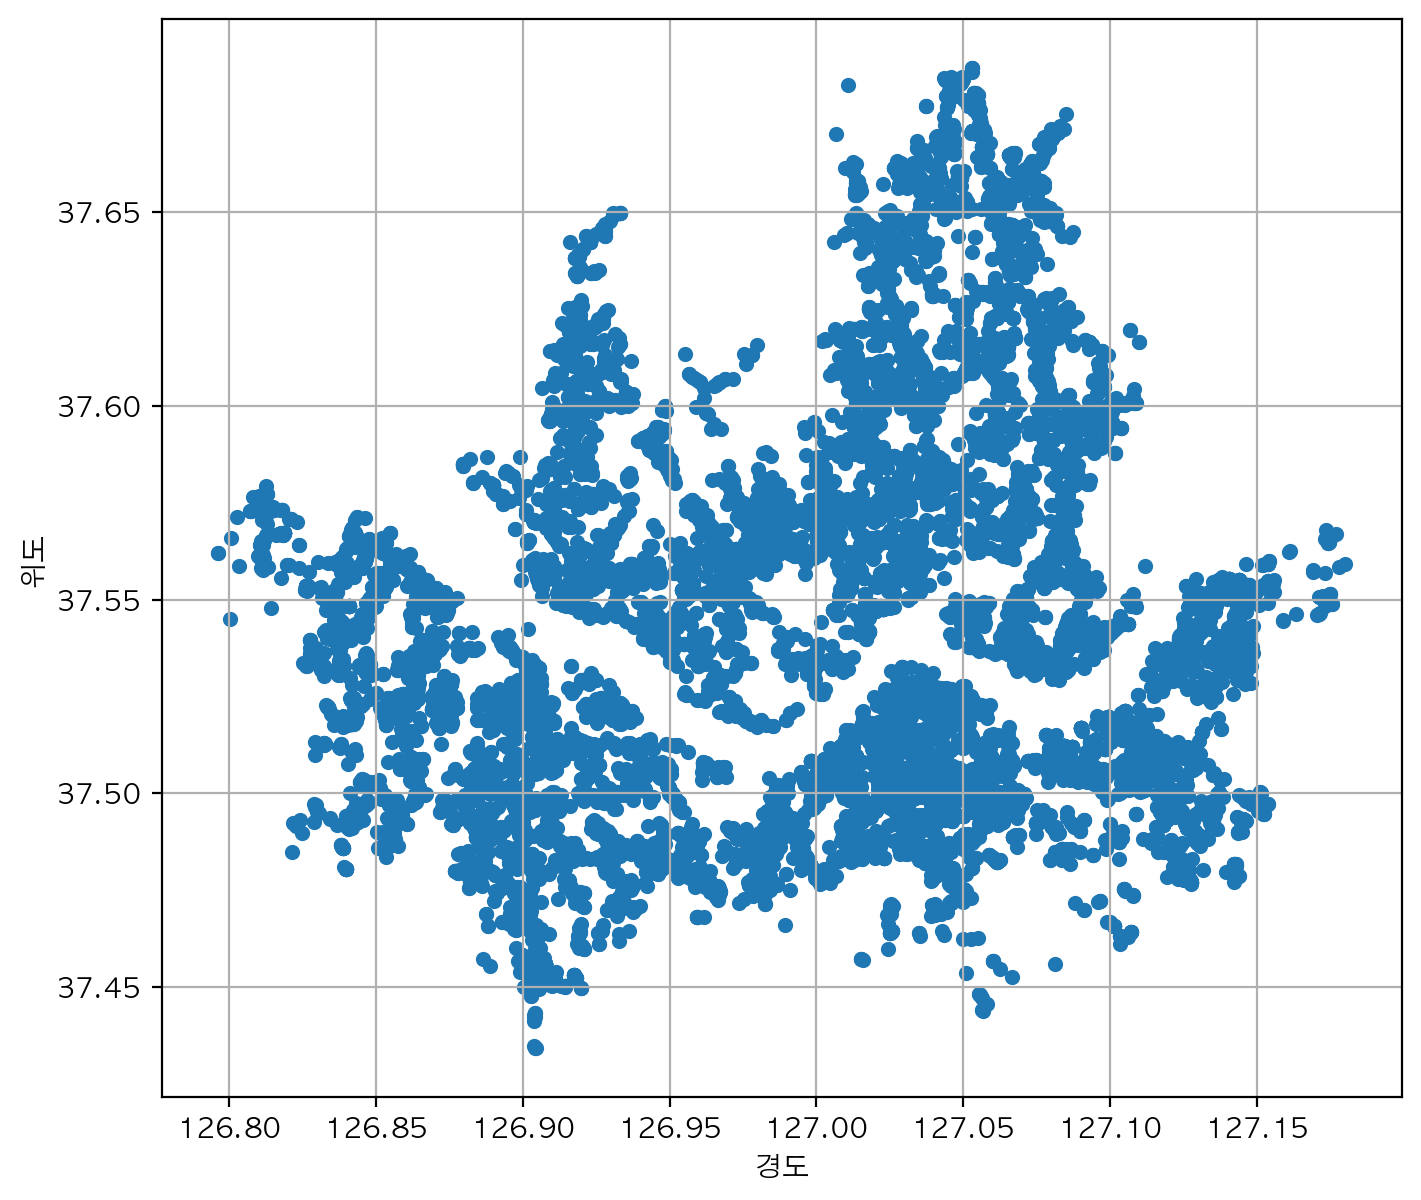

In [100]:
df_seoul[['경도','위도','시군구명']].plot.scatter(x='경도',y='위도',figsize=(8,7),grid=True) #scatter에서는 x,y축 꼭 지정

<Axes: xlabel='경도', ylabel='위도'>

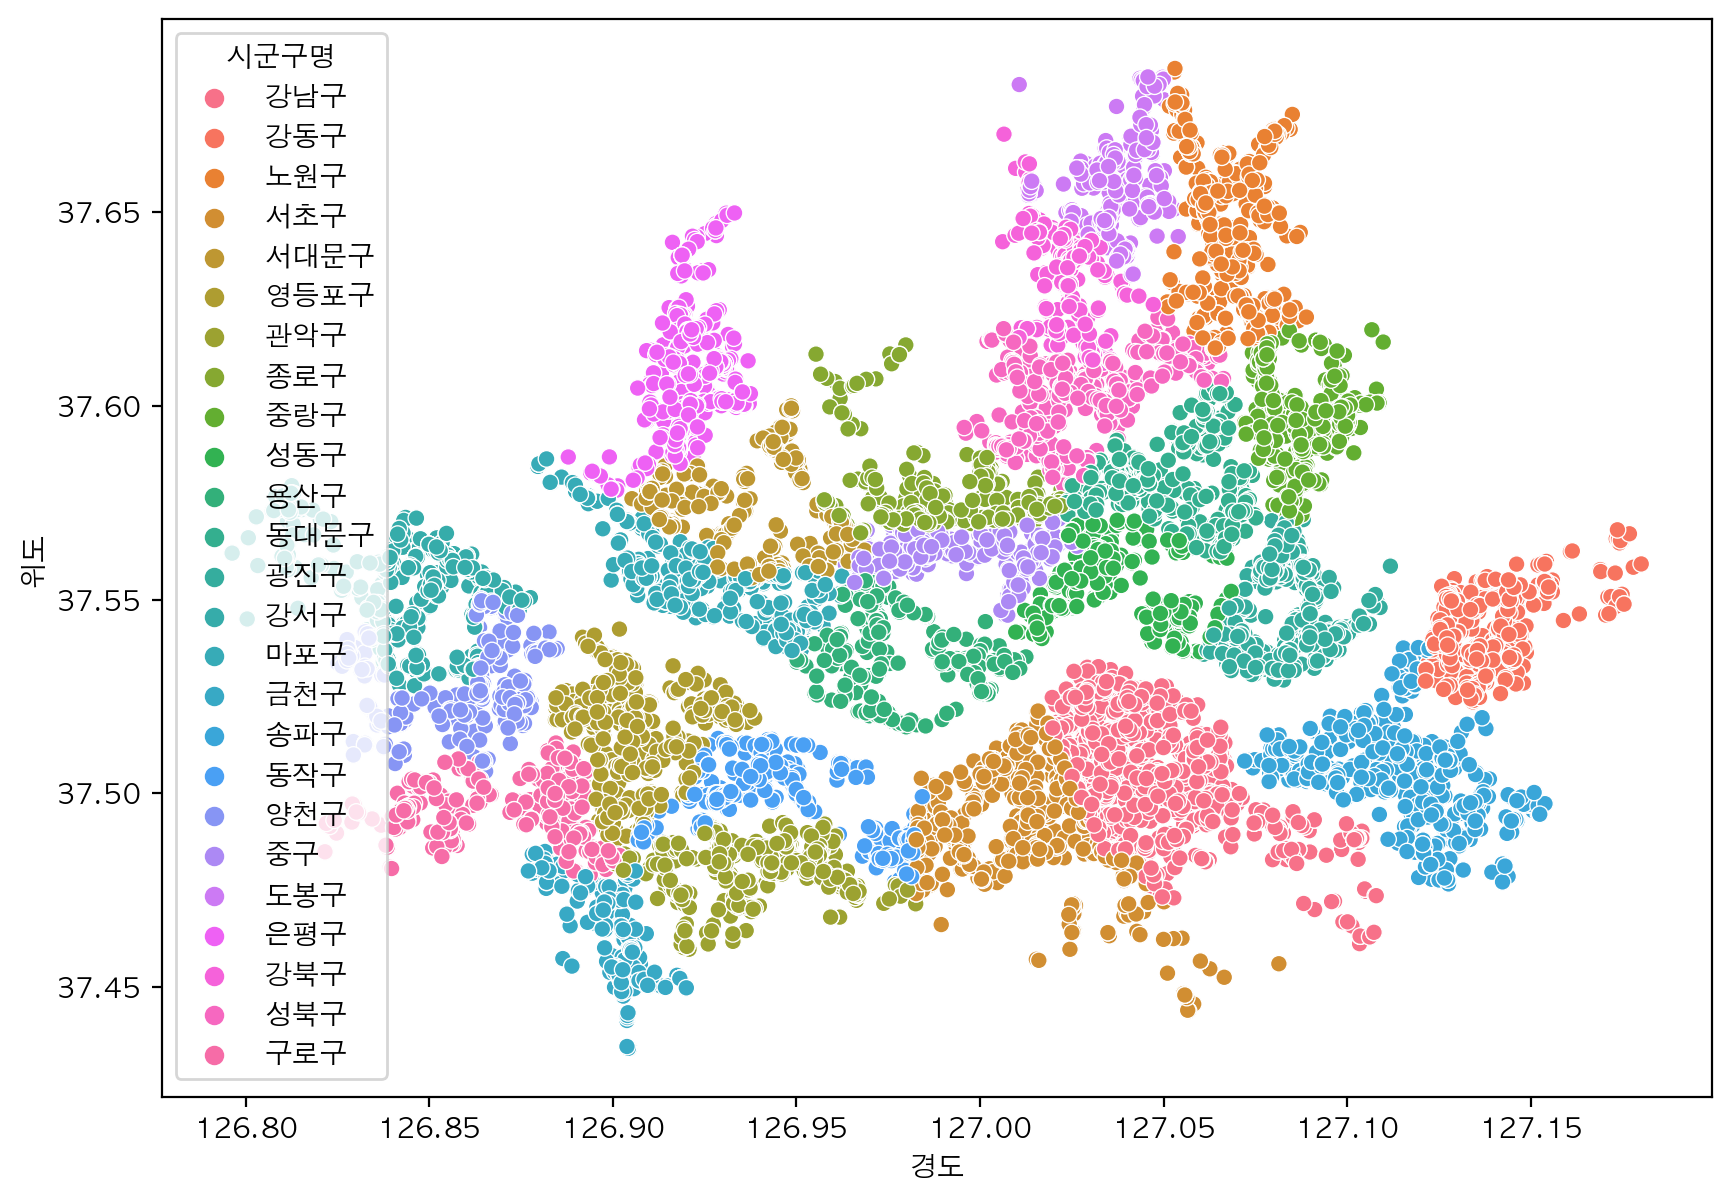

In [101]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_seoul,x='경도',y='위도',hue='시군구명') #hue를 이용해 색상을 다르게 출력

<Axes: xlabel='경도', ylabel='위도'>

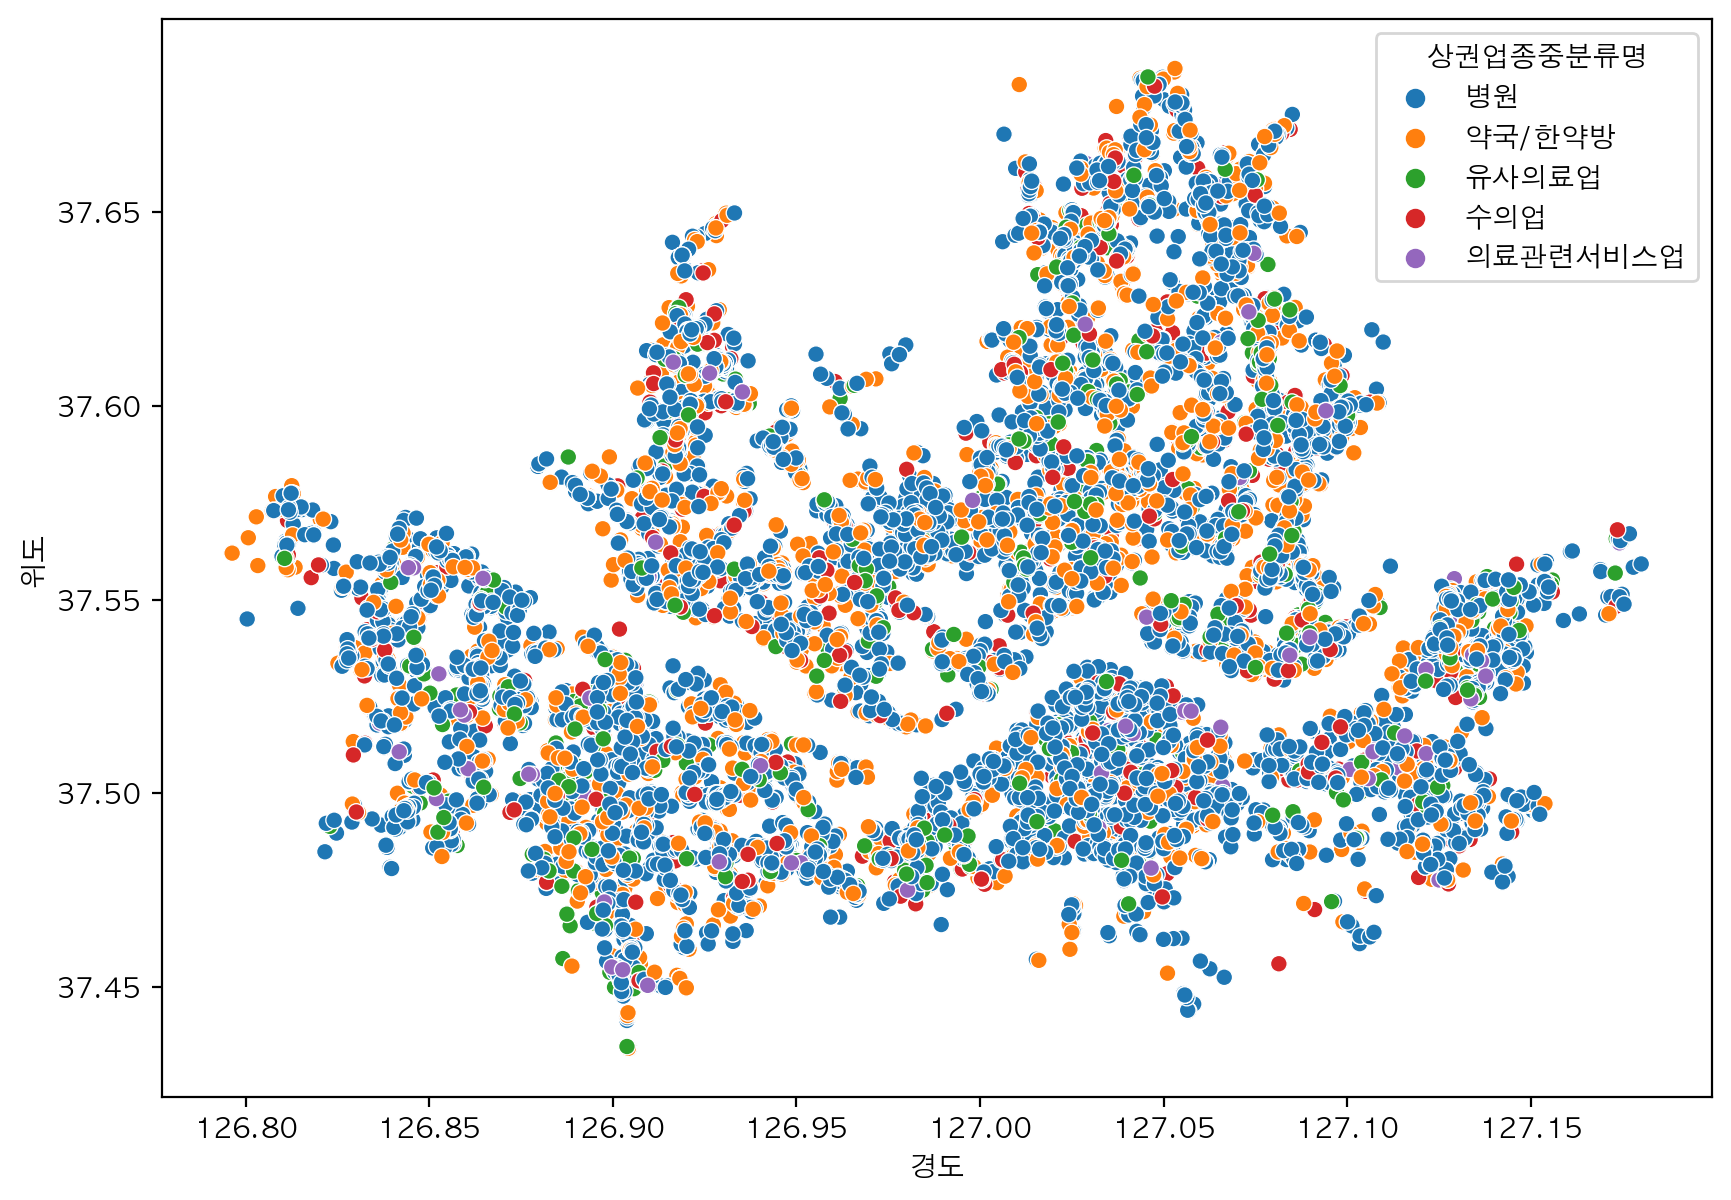

In [102]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_seoul,x='경도',y='위도',hue='상권업종중분류명')

<Axes: xlabel='경도', ylabel='위도'>

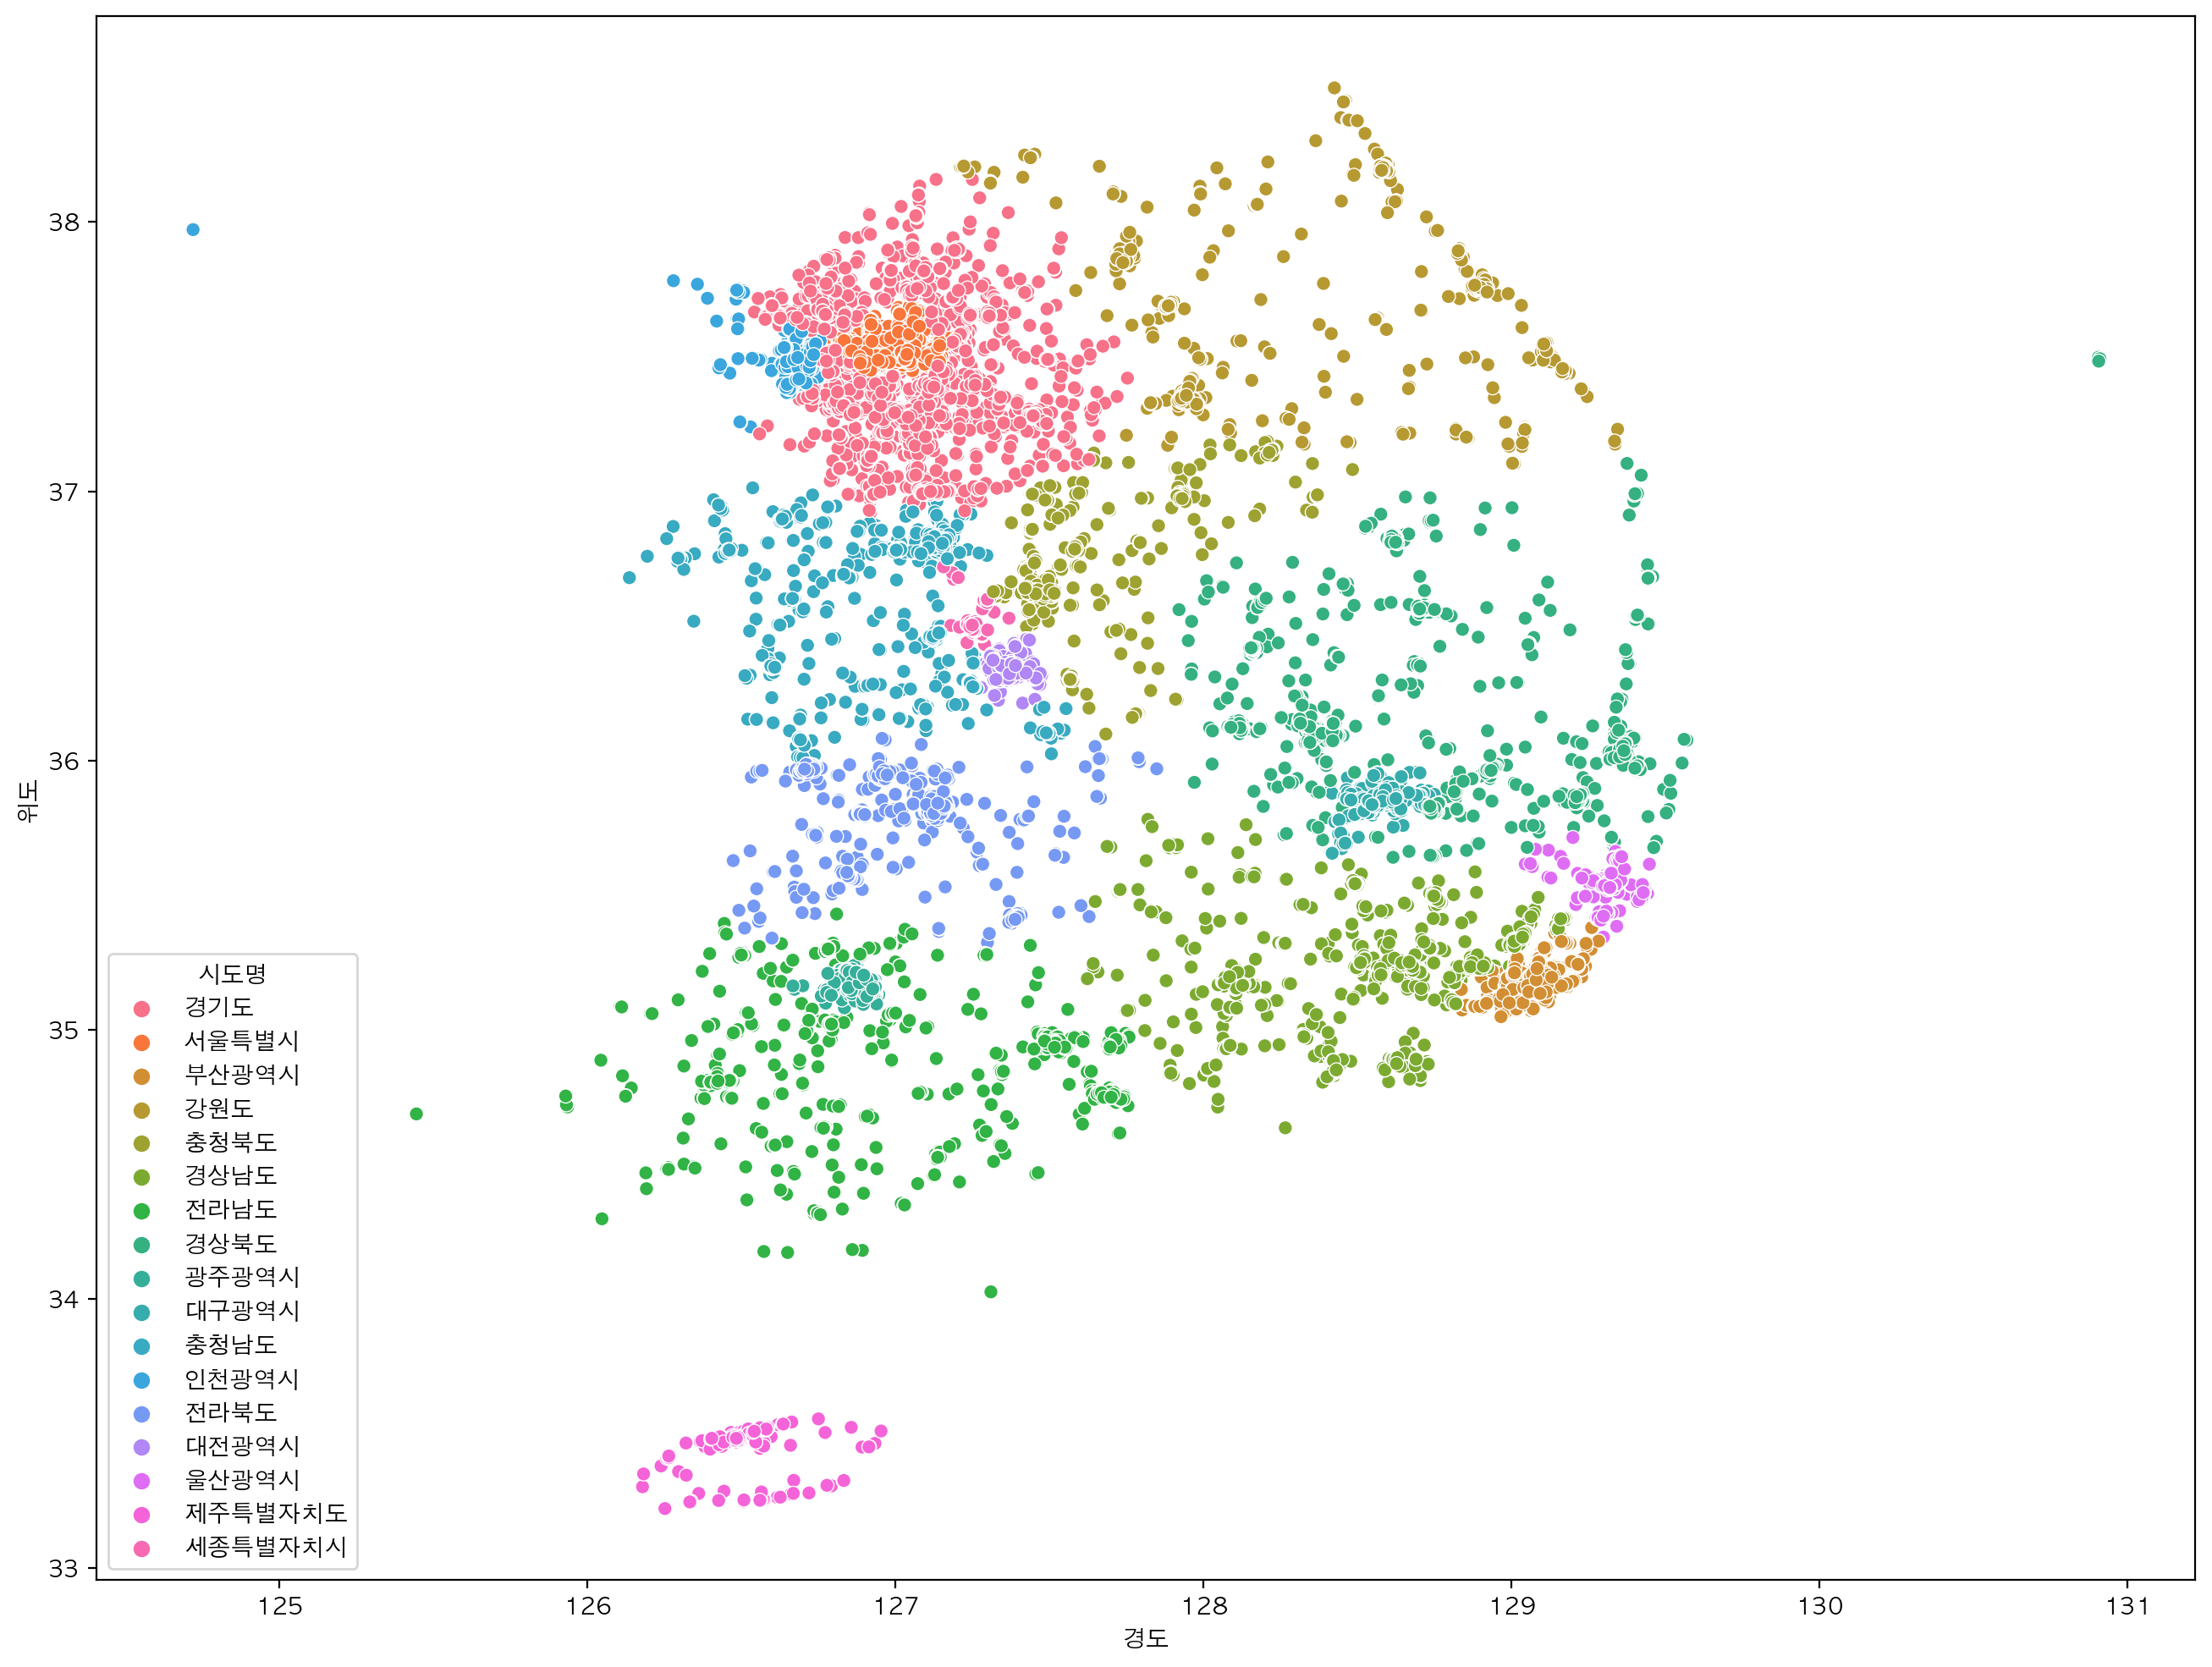

In [103]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df[:],x='경도',y='위도',hue='시도명') #전국구별로 확인하기

## folium으로 지도 표현하기

In [104]:
conda install -c conda-forge folium

Retrieving notices: ...working... DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
done
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starti

ipywidgets-8.1.1     | 111 KB    |                                       |   0% 
blinker-1.7.0        | 17 KB     |                                       |   0% 

click-8.1.7          | 82 KB     |                                       |   0% 


widgetsnbextension-4 | 865 KB    |                                       |   0% 



pip-23.3.1           | 1.3 MB    |                                       |   0% 




regex-2023.10.3      | 394 KB    |                                       |   0% 





werkzeug-3.0.1       | 236 KB    |                                       |   0% 






tornado-6.3.3        | 853 KB    |                                       |   0% 







flask-3.0.0          | 78 KB     |                                       |   0% 








comm-0.1.4           | 11 KB     |                                       |   0% 









jupyterlab_widgets-3 | 182 KB    |                                       |   0% 










setuptools-68.2.2    | 454 KB    |                    

exceptiongroup-1.2.0 | 20 KB     | #############################6        |  80% DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/osx-arm64/ca-certificates-2023.11.17-hf0a4a13_0.conda HTTP/1.1" 200 154444















ca-certificates-2023 | 151 KB    | ###9                                  |  11% 






tornado-6.3.3        | 853 KB    | ############4                         |  34% 















anyio-3.7.1          | 94 KB     | ##################################### | 100% 





werkzeug-3.0.1       | 236 KB    | ##################################### | 100% 





werkzeug-3.0.1       | 236 KB    | ##################################### | 100% 













exceptiongroup-1.2.0 | 20 KB     | ##################################### | 100% 














ca-certificates-2023 | 151 KB    | ##################################### | 100% DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/openpyxl-3.0.9-pyhd8ed1ab_0.tar.bz2 HTTP/1.

In [105]:
import folium
#df_seoul_hospital['위도'].mean()
#df_seoul_hospital['경도'].mean()
#folium.Map(location=[37.529,126.9963])
map=folium.Map(location=[df_seoul_hospital['위도'].mean(),df_seoul_hospital['경도'].mean()],\
               zoom_start=12) #zoom_start

for n in df_seoul_hospital.index:
    print(df_seoul_hospital.loc[n]) #loc는 행을 불러올 때 사용한다.

상가업소번호                        25155642
상호명                             대진의료재단
상권업종대분류코드                            S
상권업종대분류명                            의료
상권업종중분류코드                          S01
상권업종중분류명                            병원
상권업종소분류코드                       S01B01
상권업종소분류명                          종합병원
시도명                              서울특별시
시군구코드                          11215.0
시군구명                               광진구
행정동코드                       1121577000
행정동명                              중곡4동
법정동코드                     1121510100.0
법정동명                               중곡동
지번코드               1121510100200580025
대지구분코드                               1
대지구분명                               대지
지번본번지                               58
지번주소               서울특별시 광진구 중곡동 58-25
도로명코드                     112153104006
도로명                     서울특별시 광진구 긴고랑로
건물본번지                              119
건물관리번호       1121510100100580025000733
도로명주소               서울특별시 광진구 긴고랑로 119
구우편번호                    

In [106]:
map=folium.Map(location=[df_seoul_hospital['위도'].mean(),df_seoul_hospital['경도'].mean()],\
               zoom_start=12) #zoom_start

for n in df_seoul_hospital.index:
    name=df_seoul_hospital.loc[n,'상호명']
    address=df_seoul_hospital.loc[n,'도로명주소']
    popup=f'{name}-{address}'
    location=[df_seoul_hospital.loc[n,'위도'],df_seoul_hospital.loc[n,'경도']]
    folium.Marker(location=location,
                 popup=popup,
                 ).add_to(map)
map